<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER2%20%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **들어가며**

지도 학습은 입력과 출력의 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용합니다. 훈련 세트로부터 머신러닝 모델을 만드는 것이며, 이전에 본 적 없는 새로운 데이터에 대해 정확한 출력을 예측하는 것이 목표입니다. 지도 학습은 종종 데이터를 만드는 데 사람의 노력이 필요하지만 자동화를 이뤄내면 힘들고 어려운 작업의 처리 속도를 제고할 수 있습니다.

# **2.1. 분류와 회귀**

지도 학습에는 **분류(classification)**와 **회귀(regression)**가 있습니다.

분류는 미리 정의된, 가능성 있는 여러 **클래스 레이블(class label)** 중 하나를 예측하는 문제입니다. 클래스 2개로 분류하는 **이진 분류(binary classification)**와 셋 이상의 클래스로 분류하는 **다중 분류(multiclass classification)**로 나뉩니다. 1장에서 다뤘던 붓꽃을 세 품종 중 하나로 분류하는 문제는 붓꽃 품종이 3개이므로 다중 분류 문제입니다. 

이진 분류는 질문의 답이 예와 아니오만 나올 수 있는 문제입니다. 이메일에서 스팸을 분류하는 것이 대표적인 예입니다. 예/아니오 대답에 대한 질문은 "이 이메일은 스팸인가요?"입니다. 한 클래스를 **양성(positive) 클래스**, 다른 하나를 **음성(negative) 클래스**라고 합니다. 양성 클래스는 학습하고자 하는 대상을 의미하며, 스팸 메일은 양성 클래스가 됩니다. 다만 두 클래스 중에 어떤 것을 양성으로 정할지는 주관적인 문제이므로 분야에 따라 차이가 있습니다. 다른 예로는 웹사이트에 구성된 글을 사용하여 어떤 언어로 구성된 웹사이트인지 예측하는 문제가 있습니다. 이 문제에서 클래스는 미리 만들어놓은 언어 목록입니다.

회귀는 연속적인 숫자, 또는 프로그래밍 용어인 **부동소수점수(수학 용어는 실수)**를 예측하는 문제입니다. 어떤 사람의 교육 수준, 나이, 주거지를 바탕으로 연간 소득을 예측하는 것이 회귀 문제의 한 예입니다. 소득을 예측하는 경우 예측한 값은 어떤 양으로서 일정 범위 안의 어떤 숫자도 될 수 있습니다. 옥수수 농장에서 전년도 수확량과 날씨, 고용 인원수 등으로 올해 수확량을 예측하는 예도 회귀 문제입니다. 수확량 또한 어떤 숫자든 가능합니다.

출력 값에 연속성이 있는지 질문하면 회귀와 분류 문제를 쉽게 구분할 수 있습니다. 예상 출력 값 사이에 연속성이 있다면 회귀 문제입니다. 일례로 연소득을 예측하는 경우 출력에 확연한 연속성이 존재합니다. 어떤 사람이 1년에 40,000,000원 또는 40,000,001원을 벌 수 있다면 그 양은 분명 다르지만 큰 차이는 아닙니다. 우리 알고리즘이 40,000,000원을 예측해야 하는데 39,999,999원이나 40,000,001원을 예측했다고 해도 큰 문제는 아닙니다.

반대로 분류 문제로서 웹사이트가 어떤 언어로 구성되어 있는지 인식하는 작업에는 정도란 것이 존재할 수가 없습니다. 한 언어가 아니면 다른 언어입니다. 언어 사이에는 연속성이 없고 영어와 프랑스어 사이에 다른 언어는 없습니다. 물론 언어를 독립적이고 고정된 것으로 표현하는 것은 무리가 있긴 합니다. 

# **2.2. 일반화, 과대적합, 과소적합**

지도 학습에서는 훈련 데이터로 학습한 모델이 훈련 데이터와 특성이 같다면 처음 보는 새로운 데이터가 주어져도 정확히 예측할 것으로 기대합니다. 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 **일반화(generalization)**되었다고 합니다. 따라서 모델을 구축할 때는 가능하면 정확하게 일반화시켜야 합니다.

보통 훈련 세트에 대해 정확하게 예측하도록 모델을 구축합니다. 훈련 세트와 테스트 세트가 매우 비슷하면 그 모델이 테스트 세트에서도 정확하게 예측할 것으로 기대할 수 있습니다. 하지만 항상 그런 것은 아닙니다. 예를 들어 아주 복잡한 모델을 구축하면 훈련 세트에만 정확한 모델이 될 가능성도 있습니다.

가상의 예를 제시하겠습니다. 요트를 구매한 고객과 구매 의사가 없는 고객의 데이터를 활용하여 누가 요트를 살지 예측하려고 합니다. 무관심한 고객들에게는 홍보 메일을 보내지 않고 실제로 구매할 것 같은 고객들에게만 홍보 메일을 보내는 것이 목표입니다. 다만 좀 까다로운 문제입니다. 그 이유는 아직 요트를 사지 않았다고 알고 있던 고객이 사실 다른 곳에서 요트를 샀을지도 모르고, 나중에 요트를 사려고 저축하거나 계획해 뒀을 수도 있습니다.

아래는 고객 데이터입니다. 출처는 파이썬 라이브러리를 활용한 머신러닝(번역개정판)입니다.

<img src='https://drive.google.com/uc?export=view&id=1TMAwRvCh9gsF2kiUOpl35nyhA5nA0o5X' width = 50% >

이 데이터를 활용하여 새로운 고객이 요트를 구매할 것인가에 대한 질문에 만족할 만한 답을 줄 수 있는 모델을 구축해야 합니다. 새로운 고객에도 잘 작동하는 규칙을 찾아야 하므로 훈련 세트에서 100% 정확도를 달성하는 것은 크게 도움이 되지 않습니다. 테스트 세트를 따로 활용하여 훈련 세트 정확도와 테스트 세트 정확도를 가장 근접한 지점까지 맞춰야 합니다. 우리가 예측하려는 대상은 이 데이터셋이 아니라 새로운 고객이기 때문입니다. 알고리즘이 새로운 데이터도 잘 처리하는지 측정하는 방법은 테스트 세트로 모델을 평가하는 수밖에 없습니다.

직관적으로 이 데이터를 보면 간단한 모델이 새로운 데이터에 더 잘 일반화될 것이라고 예상할 수 있습니다. 예컨대 '50세 이상인 사람은 보트를 사려고 한다.'라는 규칙을 만들었다면 이 규칙은 모든 고객 데이터를 만족시킬 뿐만 아니라, 나이 외에 자녀 수나 혼인 상태를 추가한 규칙보다 더 신뢰할 수 있습니다. 이렇게 항상 간단한 모델만 찾으려는 늪에 스스로 빠지는 것을 경계해야 합니다.

주목해야 할 점은 **과대적합(overfitting)**과 **과소적합(underfitting)**이 일어나지 않도록 일반화 성능이 최대가 되는 최적점에 있는 모델을 만들어야 한다는 것입니다.

**과대적합**은 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 의미합니다. 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어나는 현상입니다. 과대적합의 경우 훈련 세트 정확도가 지나치게 높고 테스트 세트 정확도가 지나치게 낮습니다. 

**과소적합**은 너무 간단한 모델을 만드는 것을 의미합니다. '주택을 보유한 사람은 모두 요트를 사려고 한다.'와 같은 규칙만을 적용하면 데이터의 면면과 다양성을 잡아내지 못하고 훈련 세트에도 잘 맞지 않을 것입니다. 과소적합의 경우 훈련 세트 정확도가 낮고 테스트 세트 정확도가 높거나, 훈련 세트 정확도와 테스트 세트 정확도 모두 낮습니다.

정리하자면 모델을 복잡하게 할수록 훈련 데이터에 대해서는 더 정확하게 예측할 수 있으나 훈련 세트의 각 샘플에 너무 민감해져서 새로운 데이터에 잘 일반화되지 않습니다. 우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델입니다.

과대적합과 과소적합의 절충점을 아래 그림에서 나타내고 있습니다. 출처는 파이썬 라이브러리를 활용한 머신러닝(번역개정판)입니다.

<img src='https://drive.google.com/uc?export=view&id=1G_gq95m6NAtmuVcs90CKCBBwozynDMys' width = 50% >

## **2.2.1. 모델 복잡도와 데이터셋 크기의 관계**

모델 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊습니다. 데이터셋에 다양한 샘플이 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있습니다. 보통 샘플을 더 많이 모아야 다양성이 크므로, 큰 데이터셋으로는 더 복잡한 모델을 만들 수 있습니다. 그러나 같은 샘플이 중복되거나 매우 비슷한 데이터를 모으는 것은 전혀 도움이 되지 않습니다.

위에 제시한 요트 판매의 예로 돌아가겠습니다. 고객 데이터를 10,000개 모았더니 전부 '45세 이상이고 자녀가 셋 미만이며 이혼하지 않는 고객은 요트를 사려고 한다.'라는 규칙을 만족한다면 위에서 제시한 표 2-1의 샘플 12개만 사용할 때보다 훨씬 좋은 규칙이라고 여길 수 있습니다.

데이터를 더 많이 수집하고 더 복잡한 모델을 만들면 지도 학습 문제에서 종종 놀라운 결과를 얻을 수 있습니다. 이 책에서는 고정 크기의 데이터셋을 사용하는 데 집중합니다. 실무에서는 데이터를 얼마나 많이 모을지 정하는 것이 모델을 변경하거나 조정하는 것보다 이득일 수 있습니다. 데이터의 양은 큰 힘을 발휘합니다.

# **2.3. 지도 학습 알고리즘**

각 알고리즘을 자세히 설명하는 내용을 모두 읽을 필요는 없습니다. 모델을 이해하면 여러 머신러닝 알고리즘의 작동 방식을 더 잘 파악할 수 있습니다. 

## **2.3.1. 예제에 사용할 데이터셋**

작고 인위적으로 만든 데이터셋, 알고리즘의 특징을 부각하기 위해 만든 데이터셋, 실제 샘플로 만든 큰 데이터셋 등 여러 알고리즘을 설명하기 위해 여러 데이터셋을 사용하겠습니다.

두 개의 특성을 가진 `forge` 데이터셋은 인위적으로 만든 이진 분류 데이터셋입니다. 다음 코드는 이 데이터셋의 모든 샘플을 산점도로 그립니다. x축은 첫 번째 특성, y축은 두 번째 특성입니다. 모든 산점도가 그렇듯 점 하나가 각 샘플을 나타냅니다. 점의 색과 모양은 샘플이 속한 클래스(종류)를 나타냅니다.

In [1]:
pip install mglearn

     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=adefc0ea6cc95f7123c53653a257d5dc30401c2790e55596dc0d88a344576b3f
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X[:5]:
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]

y[:5]: [1 0 1 0 0]

X 데이터셋 크기: (26, 2)



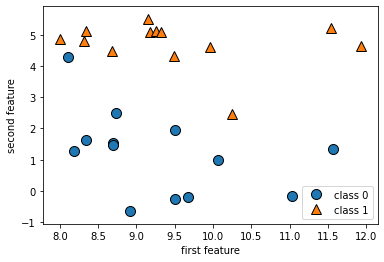

In [2]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
print(f'X[:5]:\n{X[:5]}')
print()
print(f'y[:5]: {y[:5]}')
print()
print(f'X 데이터셋 크기: {X.shape}')
print()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'], loc=4)
plt.xlabel('first feature')
plt.ylabel('second feature')

plt.show()

X 데이터셋은 샘플 26개, 특성 2개를 가집니다.

회귀 알고리즘에는 `wave` 데이터셋을 사용하겠습니다. `wave` 데이터셋은 입력 특성 하나와 모델링 할 타깃 변수(또는 응답)를 가집니다. 손쉽게 시각화하기 위해 간단한 저차원 데이터셋을 사용합니다. 특성이 적은 데이터셋(저차원 데이터셋)에서 얻은 직관은 특성이 많은 데이터셋(고차원 데이터셋)에서 유지되지 않을 수 있지만, 알고리즘을 익힐 때는 저차원 데이터셋을 사용하는 것이 매우 좋습니다.

X[:5]:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

y[:5]: [-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632]

X 데이터셋 크기: (40, 1)



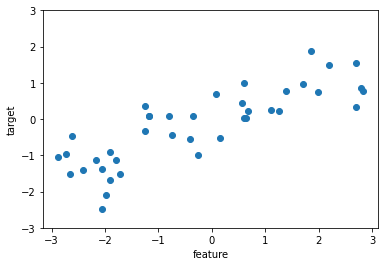

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
print(f'X[:5]:\n{X[:5]}')
print()
print(f'y[:5]: {y[:5]}')
print()
print(f'X 데이터셋 크기: {X.shape}')
print()

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('feature')
plt.ylabel('target')

plt.show()

아울러 사이킷런에 들어 있는 실제 두 데이터셋도 사용하겠습니다. 하나는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암(Wisconsin Breast Cancer) 데이터셋입니다. 줄여서 `cancer`라고 하겠습니다. 각 종양은 양성(benign)과 악성(malignant)으로 레이블되어 있고, 조직 데이터를 기반으로 종양이 악성인지 여부를 예측할 수 있도록 학습하는 것이 과제입니다. 이 데이터는 사이킷런에 있는 `load_breast_cancer` 메서드를 사용하여 가져올 수 있습니다.

사이킷런에 포함된 데이터셋은 실제 데이터와 데이터셋 관련 정보를 담고 있는 `Bunch` 객체에 저장되어 있습니다. `Bunch` 객체는 파이썬 딕셔너리(dictionary)와 비슷하지만 점 표기법을 사용할 수 있습니다. 즉 `bunch['key']`뿐만 아니라 `bunch.key`도 사용할 수 있습니다.

`cancer` 데이터셋 정보를 확인하겠습니다.

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [5]:
print('데이터셋 키:\n', cancer.keys())
print()
print('데이터 크기:', cancer.data.shape)
print()
print('특성명:\n', cancer.feature_names)

데이터셋 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

데이터 크기: (569, 30)

특성명:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
import numpy as np

print('타깃명:', cancer.target_names)
print('처음 5개 타깃:', cancer.target[:5])

print('클래스별 샘플 개수:', {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

타깃명: ['malignant' 'benign']
처음 5개 타깃: [0 0 0 0 0]
클래스별 샘플 개수: {'malignant': 212, 'benign': 357}


'malignant'가 0, 'benign'이 1입니다.

In [7]:
print('데이터셋 정보:\n\n', cancer.DESCR)

데이터셋 정보:

 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 i

아울러 회귀 분석용 실제 데이터셋으로 보스턴 주택가격(Boston Housing) 데이터셋을 사용하겠습니다. 줄여서 `boston`이라고 하겠습니다. 이 데이터셋으로 수행할 작업은 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용하여 1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것입니다. 이 데이터셋에는 샘플 506개, 특성 13개가 있습니다.

In [8]:
from sklearn.datasets import load_boston

boston = load_boston()

print('데이터셋 키:\n', boston.keys())
print()
print('데이터 크기:', boston.data.shape)
print()
print('특성명:\n', boston.feature_names)

데이터셋 키:
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

데이터 크기: (506, 13)

특성명:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [9]:
print('데이터셋 정보:\n\n', boston.DESCR)

데이터셋 정보:

 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - 

이 데이터셋에서는 입력 특성 13개뿐만 아니라 특성끼리 곱하여(**상호작용**하여) 의도적으로 확장합니다. 다시 말하면, 범죄율과 고속도로 접근성의 개별 특성과 더불어 범죄율과 고속도로 접근성 간 곱도 특성으로 여긴다는 의미입니다. 이렇게 특성을 유도하는 것을 **특성 공학(feature engineering)**이라고 합니다. 4장에서 자세하게 다루겠습니다. 유도된 데이터셋은 `mglearn.datasets` 모듈의 `load_extended_boston` 메서드를 사용하여 부를 수 있습니다.

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)

X.shape: (506, 104)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

특성 13개에서 2개씩 중복을 포함하여 짝지은 특성 91개를 더해서 104개가 됩니다. 첫 번째 특성으로 교차항 13개가 만들어지고, 두 번째 특성으로 교차항 12개가 만들어집니다. 세 번째 특성으로 교차항 11개가 만들어집니다. $13 + 12 + 11 + ... + 1 = 91$개입니다.

위 특성 공학에 대한 설명으로 이항 계수 공식을 추가하겠습니다. 중복을 고려하지 않은 이항 계수의 공식은 아래와 같습니다.

$$\begin{pmatrix}
n\\
k
\end{pmatrix}
= \frac{n!}{k!(n-k)!} = \frac{13!}{2!(13-2)!}=78$$

`load_extend_boston` 메서드는 사이킷런의 `PolynomialFeatures` 클래스를 사용하여 중복을 포함한 조합을 만듭니다. 중복을 포함한 조합의 수를 구하는 공식은 아래와 같습니다.

$$\begin{pmatrix}
\begin{pmatrix}
n\\
k
\end{pmatrix}
\end{pmatrix}
= \begin{pmatrix}
n+k-1\\
k
\end{pmatrix} \frac{14!}{2!(14-2)!} = 91$$

## **2.3.2. k-최근접 이웃**

**k-NN(k-Nearest Neighbors)** 알고리즘은 머신러닝 알고리즘 중에 가장 간단합니다. 훈련 데이터셋을 저장하는 것이 모델을 만드는 전체 과정입니다. 새로운 데이터에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 샘플인 **최근접 이웃**을 찾습니다. 최근접 이웃의 개수는 k이고 `n_neighbors` 매개변수에 지정합니다.

### **2.3.2.1. k-최근접 이웃 분류**

가장 가까운 훈련 샘플 하나를 최근접 이웃으로 찾아서 예측에 사용합니다. 단순하게 이 훈련 샘플의 출력이 예측됩니다. `forge` 데이터셋에 대한 1-최근접 이웃 모델의 예측 그래프를 그리겠습니다. 샘플(별 모양) 3개를 추가하고, 추가한 각 샘플에서 가장 가까운 훈련 데이터 포인트를 연결하겠습니다. 1-최근접 이웃 알고리즘의 예측은 이 샘플의 레이블이 되며 같은 색으로 연결하여 표시하겠습니다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


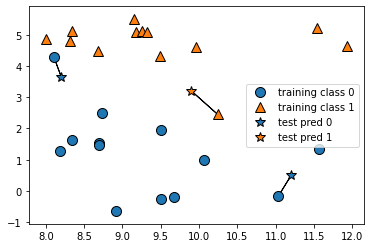

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

둘 이상의 이웃(k)을 선택할 경우에는 레이블을 정하기 위해 샘플 하나에 대해 클래스 0에 속한 이웃이 몇 개인지, 클래스 1에 속한 이웃이 몇 개인지 셉니다. 그리고 이웃이 더 많은 클래스를 예측 레이블로 지정합니다. 다시 말하면 k-최근접 이웃 중에 다수 클래스가 예측 레이블이 됩니다.

이번엔 최근접 이웃 3개를 사용하는 그림을 그리겠습니다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


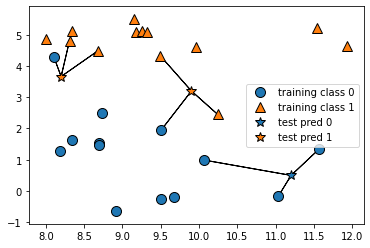

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

여기에서도 예측은 연결된 샘플의 색으로 나타납니다. 새 샘플 중에 왼쪽 위의 것은 클래스 3개 중에 클래스 1이 2개이면서 다수이므로 이웃을 하나만 사용했을 때와 예측이 달라졌습니다. 이 그림은 이진 분류 문제지만 클래스가 다수인 데이터셋에도 같은 방법을 적용할 수 있습니다. 클래스가 여러 개일 때도 각 클래스에 속한 이웃이 몇 개인지 헤아려서 가장 많은 클래스를 예측값으로 사용합니다.

사이킷런을 사용해서 k-최근접 이웃 알고리즘을 어떻게 적용하는지 살피겠습니다. 먼저 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나누겠습니다.

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


`KNeighborsClassifier` 클래스 생성기로 인스턴스를 만들고 이웃의 수를 지정하는 `n_neighbors` 매개변수(기본값 `5`)에 `3`으로 지정하겠습니다.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

훈련 세트를 사용하여 분류 모델을 학습시키겠습니다. `KNeighborsClassifier` 클래스의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것뿐입니다.

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

테스트 데이터에 대해 `predict()` 메서드를 호출하여 예측하겠습니다. 테스트 세트의 각 샘플에 대해 훈련 세트에서 가장 가까운 이웃을 계산하고 가장 많은 클래스를 찾습니다.

In [16]:
print('테스트 세트 예측:', clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


모델이 잘 일반화되었는지 평가하기 위해 `score()` 메서드에 테스트 세트를 지정하고 호출하겠습니다.

In [17]:
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


이 모델의 정확도는 86%입니다. 모델이 테스트 세트에 있는 샘플 중 86%를 정확하게 예측한 것을 의미합니다.

### **2.3.2.2. KNeighborsClassifier 분석**

2차원 데이터셋이므로 모든 테스트 샘플에 대한 예측을 xy평면에 그릴 수 있습니다. 더불어 각 샘플이 속한 클래스에 따라 평면에 색을 칠하면 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 **결정 경계(decision boundary)**를 확인할 수 있습니다.

다음 코드는 이웃이 1, 3, 9개일 때 결정 경계를 보여줍니다.

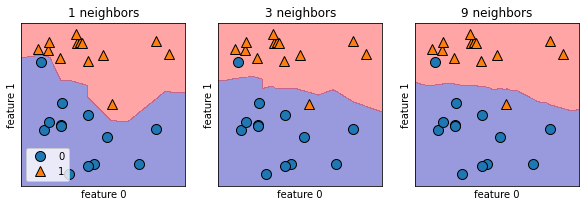

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):    
    # `fit()` 메서드는 self 오브젝트를 리턴 하므로 객체 생성과 `fit()` 메서드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)

    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{} neighbors'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

axes[0].legend(loc=3)

위 그림을 보면 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있으나, 이웃의 수를 늘릴수록 결정 경계가 점점 부드러워집니다. 부드러운 경계는 더 단순한 모델을 의미합니다. 이웃을 적게 사용하면 모델 복잡도가 높아지고, 많이 사용하면 복잡도는 낮아집니다. 전체 훈련 데이터의 개수를 이웃의 수로 지정하는 극단적인 경우에는 모든 테스트 샘플이 같은 이웃(모든 훈련 데이터)을 가지게 되므로 테스트 샘플에 대한 예측은 모두 같은 값이 됩니다. 즉 훈련 세트에서 가장 많은 샘플을 가진 클래스가 예측값이 됩니다.

앞서 살펴봤던 모델 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살피겠습니다. 이를 위해 실제 데이터인 유방암 데이터셋을 사용하겠습니다. 먼저 훈련 세트와 테스트 세트로 나누고 이웃의 수를 다르게 해서 훈련 세트와 테스트 세트의 성능을 평가하겠습니다.

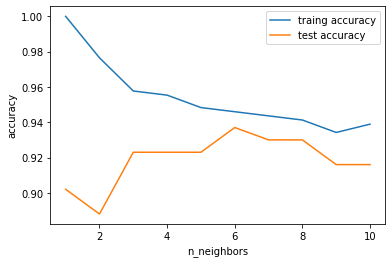

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# `n_neighbors` 매개변수에 1 ~ 10까지 지정합니다.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도를 추가합니다.
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도를 추가합니다.
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='traing accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

plt.show()

이 그림은 `n_neighbors` 수(x축)에 따른 훈련 세트와 테스트 세트 정확도(y축)를 보여줍니다. 이런 그래프는 거의 매끄럽게 나오지 않습니다. 여기서도 과대적합과 과소적합을 확인할 수 있습니다. 이웃의 수가 적을수록 모델이 복잡해지므로 그래프가 수평으로 뒤집힌 형태입니다. 최근접 이웃인 k의 수가 하나일 경우에는 훈련 데이터에 대한 예측이 완벽합니다. 그러나 이웃의 수가 늘어날수록 모델은 단순해지고 훈련 데이터의 정확도는 줄어듭니다. 이웃을 많이 사용한 경우보다 이웃을 하나 사용한 테스트 세트의 정확도가 낮은 이유는 모델을 너무 복잡하기 때문입니다. 반대로 이웃을 10개 사용했을 경우에는 모델이 너무 단순해서 정확도는 더 나빠집니다. 정확도가 가장 좋은 지점은 중간 정도인 6개입니다. 그래프의 범위를 살펴보면 가장 나쁜 정확도도 88%입니다.

### **2.3.2.3. k-최근접 이웃 회귀**

k-최근접 이웃 알고리즘은 회귀 분석에도 쓰입니다.

이번에는 `wave` 데이터셋을 사용하겠습니다. 아울러 이웃이 하나인 최근접 이웃을 사용하고, x축에 테스트 데이터 3개를 흐린 별로 표시하겠습니다. 최근접 이웃을 1개만 사용할 경우의 예측은 그저 가장 가까운 이웃의 타깃값입니다. 파란색 별로 표시하겠습니다.

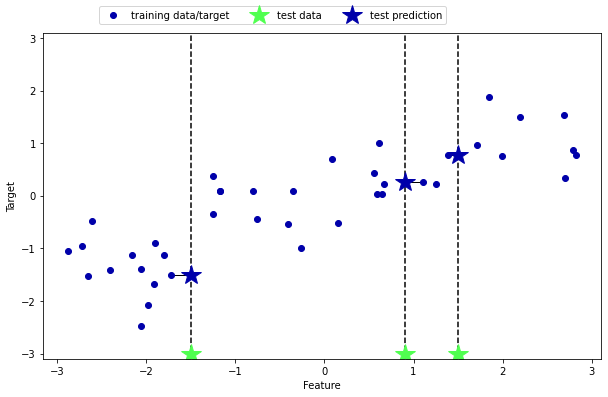

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

물론 이웃을 둘 이상 사용할 수 있습니다. 최근접 이웃 여러 개를 사용하면 여러 이웃들의 평균값을 예측값으로 삼습니다. 최근접 이웃 3개를 사용하겠습니다.

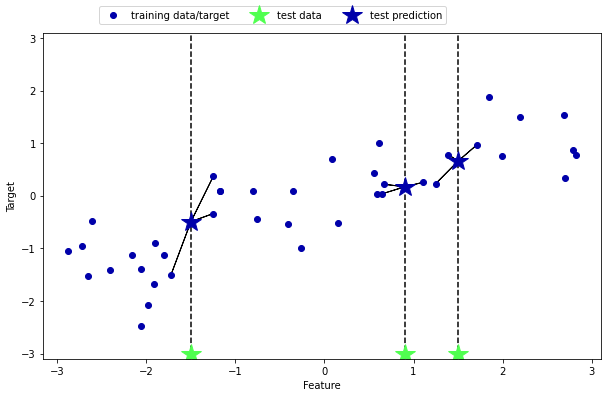

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

사이킷런에 회귀를 위한 k-최근접 이웃 알고리즘은 `KNeighborsRegressor` 클래스에 구현되어 있습니다. 사용법은 `KNeighborsClassifier` 클래스와 비슷합니다.

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

테스트 세트에 대해 예측하겠습니다.

In [23]:
print('테스트 세트 예측:\n', reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


`score()` 메서드를 사용하여 모델을 평가하겠습니다. 이 메서드는 회귀일 땐 **결정 계수**를 뜻하는 **$R^2$** 값을 반환합니다. $R^2$ 값은 회귀 모델에서 예측의 적합도를 측정한 것입니다. 보통 0~1 사잇값입니다. 1은 완벽하게 예측한 것이고, 0은 훈련 세트의 출력값인 `y_train`의 평균으로만 예측한 것입니다. 물론 음수가 되는 경우는 예측과 타깃이 상반된 경향을 가진 것입니다. 아래는 $R^2$를 구하는 공식입니다.

$$R^2 = 1-\frac{\sum_(y-\hat{y})^2}{\sum_(y-\overline{y})^2}$$

$y$는 타깃값, $\overline{y}$는 타깃값의 평균, $\hat{y}$는 모델의 예측값입니다.   
참고로 무조건 `y_train`의 평균값을 예측으로 사용하면 $R^2$의 공식에서 $\hat{y}$와 $\overline{y}$가 같고 분자와 분모가 같아져서 최종 계산값은 0이 됩니다.

In [24]:
print('테스트 세트 결정계수: {:.2f}'.format(reg.score(X_test, y_test)))

테스트 세트 결정계수: 0.83


나름 괜찮은 점수입니다.

### **2.3.2.4. KNeighborsRegressor 분석**

이 1차원 데이터셋에 대해 가능한 모든 특성 값을 만들어서 예측할 수 있습니다. 이를 위해 x축을 따라 많은 샘플을 생성해서 테스트 데이터셋을 만들겠습니다.

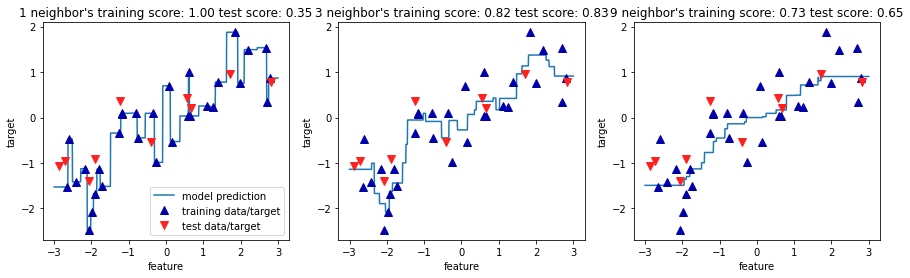

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3~3 사이에 샘플 1,000개를 만들고 2차원 배열로 바꿉니다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

# 1, 3, 9 이웃을 사용하여 예측합니다.
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor's training score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
axes[0].legend(['model prediction', 'training data/target', 'test data/target'], loc='best')

이웃을 하나만 사용할 때는 훈련 세트의 각 샘플이 예측에 주는 영향이 커서 예측값이 훈련 샘플을 모두 지나가므로 매우 불안정하게 예측합니다. 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있으나 더 안정된 예측을 얻습니다.

### **2.3.2.5. 장단점과 매개변수**

일반적으로 `KNeighbors` 분류기에 중요한 매개변수는 아래와 같습니다.

- `metric`: 샘플 사이 거리를 재는 방법을 지정하는 매개변수입니다. 기본값은 `minkowski`로 **민코프스키 거리**를 의미합니다. 기본적으로 여러 환경에서 잘 작동하는 방식은 `euclidean`인 **유클리디안 거리**입니다.

- `n_neighbors`: 이웃 수를 지정하는 매개변수입니다. 실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동합니다.

더 자세한 정보는 아래 코드로 확인하시기 바랍니다.

```
help(KNeighborsClassifier)
help(KNeighborsRegressor)
```

k-NN은 매우 이해하기 쉬운 모델이고, 많이 조정하지 않아도 자주 좋은 성능을 발휘합니다. 더 복잡한 알고리즘을 적용하기 전에 한 번쯤 시도해볼 수 있습니다.

다만, 최근접 이웃 모델은 쉽고 빠르게 만들 수 있지만 훈련 세트가 매우 크면(특성 수나 샘플 수가 크면) 예측이 느립니다. k-NN 알고리즘을 사용할 땐 데이터를 전처리 하는 과정(챕터 3에서 다룹니다)이 중요합니다. 아울러 수백 개 이상의 많은 특성을 가진 데이터셋에서는 잘 동작하지 않고, 특성 값 대부분이 0인 희소한 데이터셋에서는 특히 잘 작동하지 않습니다.

결론적으로 k-최근접 이웃 알고리즘은 이해하기 쉽지만 예측이 느리고 많은 특성을 처리하는 능력이 부족해서 현업에서 거의 쓰지 않습니다.

## **2.3.3. 선형 모델**

**선형 모델(linear model)**은 100여 년 전에 개발되었고 지난 몇 십 년간 폭넓게 연구되며 현재도 널리 쓰입니다. 입력 특성에 대한 **선형 함수**를 만들어 예측을 수행하는 모델입니다.

### **2.3.3.1. 회귀의 선형 모델**

회귀의 경우 선형 모델을 위한 일반화된 예측 함수는 아래와 같습니다.

$$\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b$$

이 식에서 $x[0]$부터 $x[p]$까지는 샘플 하나에 대한 특성을 나타내며(특성 개수는 p + 1),   
$w$와 $b$는 모델이 학습할 파라미터입니다. $\hat{y}$은 모델이 만들어낸 예측값입니다. 특성이 하나인 데이터셋이라면 이 식은 다음과 같아집니다.

$$\hat{y} = w[0] \times x[0] + b$$

$w[0]$은 기울기, $b$는 y축과 만나는 절편입니다. 특성이 많아지면 $w$는 각 특성에 해당하는 기울기를 모두 가집니다. 다르게 생각하면 예측값은 입력 특성에 $w$의 각 가중치(음수일 수도 있음)를 곱해서 더한 가중치 합으로 볼 수 있습니다.

1차원 `wave` 데이터셋으로 파라미터 $w[0]$와 $b$를 직선처럼 되도록 학습시키겠습니다.

w[0]: 0.393906  b: -0.031804


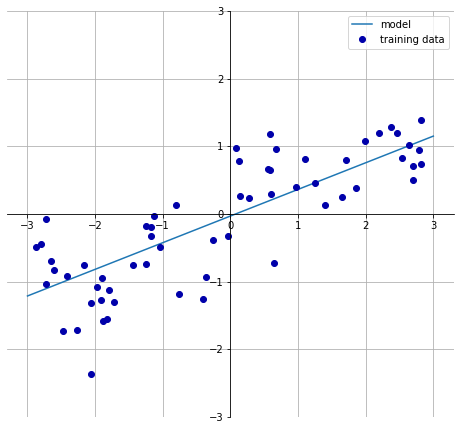

In [26]:
mglearn.plots.plot_linear_regression_wave()

그래프의 중앙을 가로질러서 x, y축을 그렸습니다. 그래프의 $w[0]$ 값을 보면 기울기는 대략 0.4 정도여야 합니다.

회귀를 위한 선형 모델은 특성이 하나일 땐 직선, 두 개일 땐 평면이 되며, 더 높은 차원(특성이 더 많음)에서는 **초평면(hyperplane)**이 되는 회귀 모델의 특징을 가집니다.

이 직선과 `KNeighborsRegressor` 클래스를 사용해서 만든 위 그래프의 선과 비교하면 직선을 사용한 예측이 제약이 더 많아 보입니다. 데이터의 상세 정보를 모두 잃어버린 것 같습니다. 타깃 y가 특성들의 선형 조합이라는 건 매우 과하고 때론 비현실적인 가정입니다. 다만 1차원 데이터만 놓고 봐서 생긴 편견일 수 있습니다. 실제로 특성이 많은 데이터셋이면 선형 모델은 매우 훌륭한 성능을 낼 수 있습니다. 특히 훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 완벽하게 훈련 세트에 대해서 선형 함수로 모델링 할 수 있습니다. 선형 대수에서 방정식(훈련 데이터)보다 미지수(모델 파라미터)가 많은 경우를 **불충분한 시스템(underdetermined system)**이라고 하며 일반적으로 무수하게 많은 해가 존재합니다.

회귀를 위한 선형 모델은 다양합니다. 이 모델들은 훈련 데이터로부터 모델 파라미터 $w$와 $b$를 학습하는 방법과 모델의 복잡도를 제어하는 방법에서 차이가 납니다. 아래부터는 회귀에서 가장 인기 있는 선형 모델들을 살피겠습니다.

### **2.3.3.2. 선형 회귀(최소제곱법)**

**선형 회귀(linear regression)** 또는 **최소제곱법(OLS, ordinary least squares)**은 가장 간단하고 오래된 회귀용 선형 알고리즘입니다. 예측과 훈련 세트에 있는 타깃 y 사이의 **평균제곱오차(mean squared error)**를 최소화하는 파라미터 $w$와 $b$를 찾습니다. 평균제곱오차는 예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플 개수로 나눈 것입니다. 선형 회귀는 매개변수가 없는 것이 장점이지만 모델의 복잡도를 제어할 방법은 없습니다.

평균제곱오차의 공식은 아래와 같습니다.

$$MSE = \frac{1}{n} \displaystyle\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$$

n은 샘플 개수를 의미합니다.

선형 모델을 만들어보겠습니다.

In [27]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

기울기 파라미터($w$)는 **가중치(weight)** 또는 **계수(coefficient)**라고 하며 lr 객체의 `coef_` 속성에 저장됩니다. **편향(intercept)** 파라미터($b$)는 **절편**이라고 하며 `intercept_` 속성에 저장됩니다.

In [28]:
print('lr.coef_:', lr.coef_)
print('lr.intercept_:', lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


`coef_` 속성은 각 입력 특성에 하나씩 대응되는 넘파이 배열입니다. `wave` 데이터셋에는 입력 특성이 하나뿐이므로 원소를 하나만 갖고 있습니다. `intercept_` 속성은 항상 실수값 하나입니다.

훈련 세트와 테스트 세트의 성능을 확인하겠습니다.

In [29]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


좋은 $R^2$값이라고 할 수 없습니다. 두 점수가 매우 비슷하면서 낮은 과소적합입니다. 1차원 데이터셋에서는 모델이 매우 단순하거나 제한적이므로 과대적합이 일어날 가능성이 낮으나, 특성이 많은 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합이 일어날 가능성이 높습니다.

`LinearRegression` 모델이 보스턴 주택가격 데이터셋 같은 복잡한 데이터셋에서 어떻게 작동하는지 살피겠습니다. 이 데이터셋에는 샘플 506개, 특성은 위에서 특성공학으로 유도한 것까지 합쳐서 104개입니다. 먼저 데이터셋을 읽고 훈련 세트와 테스트 세트로 나눈 후에 선형 모델을 만들겠습니다.

In [30]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

훈련 세트와 테스트 세트의 점수를 비교하겠습니다.

In [31]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


훈련 세트에서는 예측이 매우 정확한데, 테스트 세트에서는 $R^2$ 값이 매우 낮습니다. 모델이 과대적합 된 것이므로 복잡도를 제어할 수 있는 모델을 사용해야 합니다. 아래에서 **리지(Ridge)**와 **라소(Lasso)**를 토대로 설명을 이어가겠습니다.

### **2.3.3.3. 리지 회귀**

**리지(Ridge)**도 회귀를 위한 선형 모델입니다. 최소적합법에서 사용한 것과 같은 예측 함수를 사용합니다. 다만 리지 회귀에서의 가중치($w$) 선택은 훈련 데이터를 잘 예측하기 위한 목적뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있습니다. 가중치의 절댓값을 가능한 한 작게 만드는 것입니다. 다시 말하면 $w$의 모든 원소가 0에 가깝게 되길 원합니다. 모든 특성이 출력에 주는 영향을 최소한으로 만든다(기울기를 작게 만든다)라고 생각할 수 있습니다. 이런 제약을 **규제(regularization)**라고 하며 과대적합이 되지 않도록 모델을 강제로 제한한다는 것 의미합니다. 리지 회귀에 사용하는 규제 방식을 **L2 규제**라고 합니다.

리지 회귀가 확장된 보스턴 주택가격 데이터셋에 어떻게 적용되는지 살피겠습니다.

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


결과를 보면 훈련 세트 점수는 `LinearRegression`보다 낮지만 테스트 세트 점수는 더 높습니다. 리지는 선형 회귀보다 덜 자유로운 모델이기 때문에 과대적합이 완화됩니다. 모델 복잡도가 낮아지면 훈련 세트에서 성능은 나빠지지만 더 일반화된 모델이 됩니다. 테스트 세트에 대한 성능을 제고해야 하므로 리지 모델을 활용해야 합니다.

리지는 모델을 단순하게(계수를 0에 가깝게) 하고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공합니다. 훈련 세트 성능 대비 모델을 얼마나 단순화할지 `alpha` 매개변수에 지정할 수 있습니다. 위에서는 `alpha` 매개변수의 기본값인 `1.0`을 사용했으나 이 값이 최적이라고 생각할 근거는 없습니다. 최적의 `alpha` 값은 사용하는 데이터셋마다 달라지며, `alpha` 값을 높이면 계수를 0에 더 가깝게 만들기 때문에 훈련 세트 성능은 나빠지지만 일반화하는 데 도움이 됩니다.

`alpha` 값을 높여보겠습니다.

In [33]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수: {:2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수: {:2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.788279
테스트 세트 점수: 0.635941


<img src='https://drive.google.com/uc?export=view&id=1G_gq95m6NAtmuVcs90CKCBBwozynDMys' width = 50% >   

`alpha` 값을 높이면 계수에 대한 제약이 강해지면서 그림의 왼쪽으로 이동합니다.   
반면에 `alpha` 값을 줄이면 계수에 대한 제약이 약해지면서 그림의 오른쪽으로 이동합니다. 아주 작은 `alpha` 값은 계수를 거의 제한하지 않으므로 `LinearRegression` 클래스로 만든 모델과 거의 같아집니다(실험한 바에 의하면 `alpha` 값을 `0.00001`로 지정하면 `LinearRegression`에서 얻은 훈련 세트 점수 0.95, 테스트 세트 점수 0.61과 완전 동일해집니다).

이번에는 `alpha` 매개변수 값을 낮춰서 훈련해보겠습니다.

In [34]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수: {:2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수: {:2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.928227
테스트 세트 점수: 0.772207


`alpha` 값을 `0.1`로 지정했을 때 꽤 좋은 성능을 낸 것 같지만 여전히 과대적합입니다. 테스트 세트에 대한 성능이 높아질 때까지 값을 조정해야 합니다. 좋은 매개변수를 지정하는 방법은 5장에서 자세하게 다룰 예정입니다.

`alpha` 값에 따라 모델의 `coef_` 속성이 어떻게 달라지는지 조사하면 `alpha` 매개변수가 모델을 어떻게 변경시키는지 자세하게 이해할 수 있습니다. 작은 `alpha` 값일 때보다 높은 `alpha` 값일 때 제약이 더 많은 모델이므로 `coef_` 속성의 절댓값 크기는 더 작을 것으로 예상할 수 있습니다. 그래프로 그려보겠습니다.

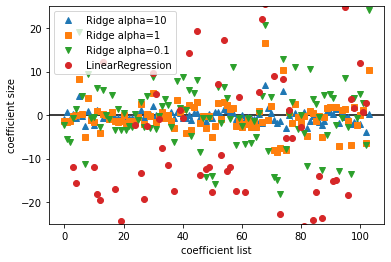

In [35]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('coefficient list')
plt.ylabel('coefficient size')
# 축의 범위를 제한하는 객체를 만듭니다.
xlims = plt.xlim()
# 수평선을 그립니다.
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

plt.show()

x축은 `coef_` 속성의 원소를 위치대로 나열한 것입니다. `x=0`은 첫 번째 특성에 연관된 계수이고, `x=1`은 두 번째 특성에 연관된 계수입니다. 이렇게 `x=100`까지 계속됩니다.

y축은 각 계수의 수치를 나타냅니다. `alpha=10`일 때 계수 대부분은 -3~3 사이에 위치하며, `alpha=1`일 때 계수는 좀 더 커졌습니다. `alpha=0.1`일 때 계수는 더 커지며 규제가 전혀 없는(`alpha=0`) 선형 회귀의 계수는 값이 더 커져서 그림 밖으로 넘어갑니다.

규제의 효과를 이해하는 다른 방법은 `alpha` 값을 고정하고 훈련 데이터의 크기를 변화시키는 것입니다. 보스턴 주택가격 데이터셋에서 여러 크기로 샘플링 해서 `LinearRegression` 클래스와 `Ridge(alpha=1)` 클래스를 적용하겠습니다.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

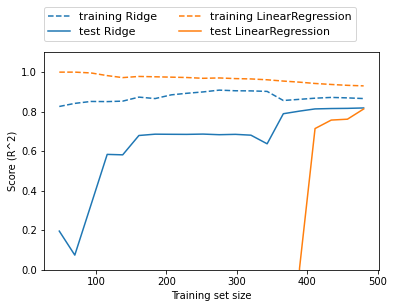

In [36]:
mglearn.plots.plot_ridge_n_samples()

이렇게 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 **학습 곡선(learning curve)**이라고 합니다(훈련 과정을 여러 번 반복하면서 학습하는 알고리즘에서는 반복 횟수에 따른 성능 변화를 나타내는 그래프를 학습 곡선이라고 합니다).

모든 데이터셋에 대해 선형 회귀와 리지 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높습니다. 리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전반적으로 선형 회귀의 훈련 데이터 점수보다 낮지만, 테스트 데이터에서는 리지의 점수가 더 높고 작은 데이터셋에서도 더 높습니다. 데이터셋 크기가 400 미만인 지점에서는 선형 회귀는 어떤 것도 학습하지 못하고 있습니다. 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에는 선형 회귀가 리지 회귀를 따라잡습니다.

주목할 점은 데이터를 충분히 사용하면 규제 항은 덜 중요해지므로 리지 회귀와 선형 회귀의 성능이 같아진다는 것입니다. 그리고 데이터를 충분히 사용하면 선형 회귀의 훈련 데이터 성능이 점차 감소하는 것을 알 수 있는데, 이러한 이유는 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합 되기 어려워지기 때문입니다.

### **2.3.3.4. 라소**

선형 회귀에 규제를 적용하는 데 릿지의 대안으로 **라소(Lasso)**가 있습니다. **L1 규제**라고 합니다. 리지처럼 계수를 0에 가깝게 만들려고 하지만 방식이 조금 다릅니다. L1 규제의 결과로 어떤 계수는 0이 되기도 하는데, 이 말은 모델에서 완전히 제외되는 특성이 생긴다는 의미입니다. **특성 선택(feature selection)**이 자동으로 이뤄진다고 할 수 있습니다. 따라서 일부 계수를 0으로 만들면 이해하기 쉬워지고 모델에서 가장 중요한 특성이 무엇인지 알 수 있게 됩니다.

참고로 라소는 계수 벡터의 L1 노름을 페널티로 사용하며 다른 말로는 계수의 절댓값의 합입니다. 평균제곱오차 식에 아래 항이 추가됩니다.

$$\alpha\displaystyle\sum_{j=1}^{m}\begin{vmatrix} w_j\end{vmatrix}$$

리지와 마찬가지로 $\alpha$를 크게 하면 페널티의 효과가 커지고(가중치 감소), $\alpha$를 작게 하면 그 반대가 됩니다.

라소는 L1, L2 규제를 함께 쓰는 **엘라스틱넷(Elastic-Net)** 방식에서 L2 규제가 빠진 것입니다. 라소의 `alpha` 매개변수는 R의 엘라스틱넷 패키지인 `glmnet`의 `lambda` 매개변수와 같은 의미입니다. 이들은 한 특성씩 좌표축을 따라 최적화하는 **좌표 하강법(coordinate descent)** 방식을 사용하며 학습 과정이 반복적으로 여러 번 진행되면서 최적의 값을 찾아갑니다.

확장된 보스턴 주택가격 데이터셋에 라소를 적용하겠습니다.

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성의 개수:', np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


두 점수 모두 결과가 좋지 않습니다. 과소적합입니다. 특성 104개 중 4개만 사용했습니다. 라소도 리지처럼 계수를 조정하는 `alpha` 매개변수를 지원합니다. 위에서는 기본값 `1.0`을 사용했으나 이번엔 과소적합을 줄이고자 `alpha` 값을 줄이겠습니다. 여기서 `max_iter` 매개변수 값을 늘려야 하는데, 이 매개변수는 반복 실행하는 최대 횟수를 의미합니다. 이 값을 늘리지 않으면 값을 늘리라는 경고가 발생합니다.

In [38]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('사용한 특성의 개수:', np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


`alpha` 값을 낮추면 모델 복잡도는 커지고 훈련 세트와 테스트 세트 모두 성능이 좋아집니다. 성능은 리지보다 조금 좋고, 사용된 특성은 33개뿐이라서 모델을 분석하기 더 쉽습니다.

그러나 `alpha` 값을 너무 낮추면 규제 효과가 없어져서 과대적합이 되므로 `LinearRegression` 클래스의 결과와 비슷해집니다.

In [39]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('사용한 특성의 개수:', np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


`alpha` 값이 다른 모델들의 계수를 그래프로 그리겠습니다. 비교를 쉽게 하기 위해 리지 회귀를 원 모양으로 나타내겠습니다. 

Text(0, 0.5, 'coefficient size')

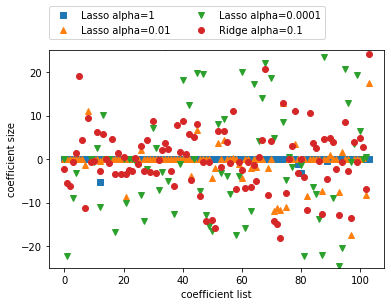

In [40]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('coefficient list')
plt.ylabel('coefficient size')

`alpha=1`일 때 계수 대부분이 0일 뿐만 아니라 나머지 계수들도 크기가 작은 걸 알 수 있습니다. `alpha=0.01`일 때 특성 대부분이 0이 되는 분포를 얻습니다. `alpha=0.0001`일 때 계수 대부분이 0이 아니고 값도 커져서 상당히 규제받지 않은 모델을 얻습니다. `alpha=0.1`인 리지 모델은 `alpha=0.01`인 라소 모델과 성능이 비슷하지만, 리지를 사용하면 어떤 계수도 0이 되지 않습니다.

실제로 리지와 라소 중에 더 선호하는 모델은 **리지**입니다. 다만 특성이 많아서 특성 중에 일부만 중요하거나 분석하기 쉬운 모델을 원한다면 일부 특성만 사용하는 라소가 더 좋은 선택일 수 있습니다.

사이킷런은 라소와 리지의 페널티를 결합한 `ElasticNet` 클래스도 제공합니다. 실제로 이 조합은 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 2개를 조정해야 합니다. `ElasticNet`에 있는 `l1_ratio` 매개변수는 `R`의 `glimnet` 패키지의 `alpha` 매개변수와 동일한 것이며 L1 규제와 L2 규제의 비율을 조정합니다. `l1_ratio`는 `0`과 `1` 사이의 값을 지정하며, L2 비율은 1-`l1_ratio`가 됩니다. `ElasticNet` 클래스의 규제 식은 아래와 같습니다.

$$ alpha \times l1\_ratio \times \displaystyle\sum_{j=1}^{m}\begin{vmatrix} w_j\end{vmatrix} + \frac{1}{2} \times alpha \times (1-l1\_ratio) \times \displaystyle\sum_{j=1}^{m} w^2_j$$

이 식의 L1 규제와 L2 규제를 `l1`, `l2`라는 매개변수로 표현하면 아래와 같습니다.

$$l_1 \times \displaystyle\sum_{j=1}^{m}\begin{vmatrix} w_j\end{vmatrix} + \frac{1}{2} \times l_2 \times \displaystyle\sum_{j=1}^{m} w^2_j$$

이때 `alpha` = `l1` + `l2`가 되고 `l1_ratio` = $\frac{l_1}{l_1+l_2}$가 되므로 필요한 규제의 정도인 `l1`, `l2`에 맞추어 `alpha`와 `l1_ratio`를 지정할 수 있습니다.

### **2.3.3.5. 분류용 선형 모델**

선형 모델은 분류에도 널리 사용합니다. 먼저 이진 분류(binary classification)의 경우 예측을 위한 방정식은 아래와 같습니다.

$$\hat{y} = w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b > 0$$

선형 회귀와 아주 비슷한 방정식이지만 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교합니다. 0보다 작으면 클래스를 -1로 예측하고, 0보다 크면 +1로 예측합니다. 이 규칙은 분류에 쓰이는 모든 선형모델과 동일하며, 계수($w$)와 절편($b$)를 찾기 위한 방법이 많이 존재합니다.

회귀용 선형 모델에서는 출력 $\hat{y}$이 특성의 선형 함수였습니다. 직선, 평면, 초평면(차원이 3 이상)을 의미합니다. 반면에 분류용 선형 모델에서는 **결정 경계**가 입력의 선형 함수입니다. 다른 말로 (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기입니다.

선형 모델을 학습시키는 알고리즘은 두 방법으로 구분할 수 있습니다. 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법과, 사용할 수 있는 규제가 있는지, 있다면 어떤 방식을 택하여 적용하는 방법입니다.

알고리즘들은 훈련 세트를 잘 학습하는지 측정하는 방법이 각기 다릅니다. 수학적, 기술적 이유로 알고리즘들이 만드는 잘못된 분류의 수를 최소화하도록 $w$와 $b$를 조정하는 것은 불가능합니다. 물론 많은 애플리케이션에서 앞 목록의 첫 번째 항목(손실 함수(loss function))에 대한 차이는 크게 중요하지 않습니다.

유명한 선형 분류 알고리즘은 **로지스틱 회귀(logistic regression)**와 선형 **서포트 벡터 머신(support vector machine)**입니다. 이 중에 로지스틱 회귀는 명칭에 회귀가 들어가지만 회귀 알고리즘과 전혀 관련이 없는 분류 알고리즘입니다.

로지스틱 회귀는 선형 함수에 시그모이드 함수가 적용된 것으로 종종 표현됩니다. 분류의 기준이 되는 시그모이드 함수의 결괏값은 0.5로 선형 함수가 0일 때이므로 선형 함수를 기준으로도 나타낼 수 있습니다. `LogisticRegression` 클래스의 `predict()` 메서드는 선형 함수 값을 계산하는 `decision_function()` 메서드를 사용하여 0을 기준으로 예측을 만듭니다. 시그모이드 함수를 적용한 확률값은 `predict_proba()` 메서드에서 제공합니다.

분류에서 잘못 분류된 결과를 직접 나타내는 0-1 손실 함수는 완전한 계단 함수이므로 대리할 수 있는 다른 함수(surrogate loss function)를 사용하여 최적화를 수행합니다.

`LogisticRegression` 클래스는 이진 분류에서 **로지스틱(logistict)** 손실 함수를 사용하고, 다중 분류에서는 **크로스 엔트로피(cross entrophy)** 손실 함수를 사용합니다.

`LinearSVC` 클래스는 기본값으로 **제곱 힌지(squared hinge)** 손실 함수를 사용합니다. `LogisticRegression` 클래스와 `LinearSVC` 클래스는 사이킷런 0.20 버전부터 `verbose` 매개변수와 상관없이 알고리즘이 `max_iter` 반복 안에 수렴하지 않으면 반복 횟수를 증가하라는 경고를 출력합니다. `LogisticRegression` 클래스의 `max_iter` 매개변수의 기본값은 `100`, `LInearSVC`의 `max_iter` 매개변수의 기본값은 `1,000`입니다. 참고로 'SVC'는 'support vector classifier'의 약자입니다.

`forge` 데이터셋을 사용하여 `LogisticRegression` 모델과 `LinearSVC` 모델을 만들고 이 선형 모델들이 만든 결정 경계를 그림으로 나타내겠습니다. 기본 매개변수를 사용하며, `forge` 데이터셋의 첫 번째 특성을 x축에, 두 번째 특성을 y축에 놓겠습니다. 결정 경계를 직선으로 표시하고 위쪽은 클래스 1, 아래쪽은 클래스 0으로 분류하겠습니다. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


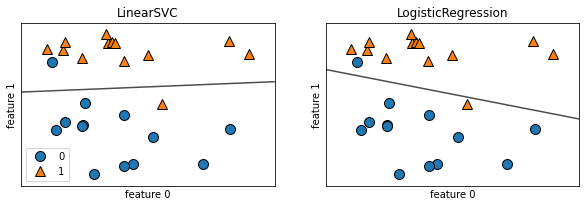

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend()

두 모델 모두 샘플을 2개씩 잘못 분류했습니다. L2 규제를 기본으로 사용했습니다.

두 모델에서 규제 강도를 결정하는 매개변수는 `C`이며 기본값은 `1.0`입니다. 이 값이 높아지면 규제 강도가 감소하여 훈련 세트에 최대로 맞추고(각각 샘플을 정확하게 분류하고), 값이 낮아지면 규제 강도가 증가하여 계수 벡터($w$)가 0에 가까워지도록 만듭니다(샘플 중 다수에 맞춥니다).

`LinearSVC` 클래스에 다른 `C` 값을 지정하여 만든 `LinearSVM` 모델의 결정 경계를 그려보겠습니다.

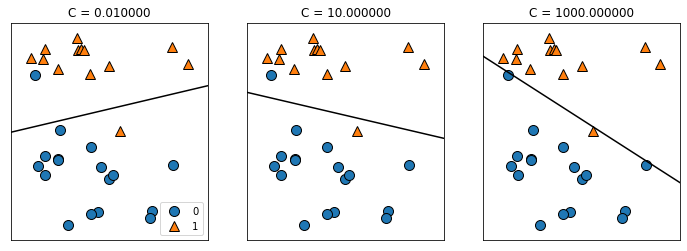

In [42]:
mglearn.plots.plot_linear_svc_regularization()

첫 번째 그림의 경우 매우 작은 값을 지정했기 때문에 규제가 많이 적용되었고, 클래스0 대부분은 아래에 있으며, 클래스1 대부분은 위에 있습니다. 규제가 강해지면서 비교적으로 수평에 가까운 결정 경계를 형성했습니다. 잘못 분류한 샘플은 2개입니다.   

중간 그림의 경우 값을 높여서 지정했기 때문에 잘못 분류한 두 샘플에 민감해지면서 결정 경계가 기울었습니다.

세 번째 그림의 경우 값을 매우 높여서 지정했기 때문에 결정 경계는 더 기울었고 클래스 0의 모든 샘플을 올바로 분류했습니다. 다만 이 데이터셋은 직선만으로는 모든 샘플을 분류할 수 없으므로 클래스 1의 샘플 1개는 분류해낼 수 없었습니다. 과대적합 모델입니다.

회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이므로 매우 제한적입니다. 그러나 고차원에서는 분류에 대한 선형 모델이 매우 강력해집니다. 다만 특성이 많아지면 과대적합 되지 않도록 주의해야 합니다.

유방암 데이터셋을 사용하여 `LogisticRegression`을 분석하겠습니다.

In [43]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수: {:3f}'.format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958042


책에 나온 점수와 다르게 출력됐습니다. 추측하건대 사이킷런 버전이 업데이트 되면서 알고리즘이 변화했을 가능성이 높습니다. `C`의 기본값 `1`이 각 세트 점수에 꽤 좋은 성능을 내고 있지만 테스트 세트 점수가 훈련 세트 점수보다 높으므로 과소적합입니다.

모델 제약을 풀어보기 위해 `C` 값을 `100`으로 증가시키겠습니다.


In [44]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수: {:3f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.972028


훈련 세트 정확도가 증가하고 테스트 세트 정확도도 약간 증가했습니다. 복잡도가 높은 모델일수록 성능이 좋다는 점을 의미합니다. 이 또한 책에 나온 점수와 다르게 출력됐습니다.

규제를 더 강하게 하기 위해 `C` 값을 `0.01`로 내리겠습니다.




In [45]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수: {:3f}'.format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951049


 <img src='https://drive.google.com/uc?export=view&id=1G_gq95m6NAtmuVcs90CKCBBwozynDMys' width = 50% >

그림을 기준으로 설명하자면 이미 과소적합 된 모델에서 왼쪽으로 더 이동하므로 `C` 값이 기본값일 때보다 두 세트의 정확도는 더 낮아졌습니다. 이 또한 책에 나온 점수와 다르게 출력됐습니다.

`C` 값을 다르게 하여 학습시킨 모델의 계수를 확인하겠습니다.

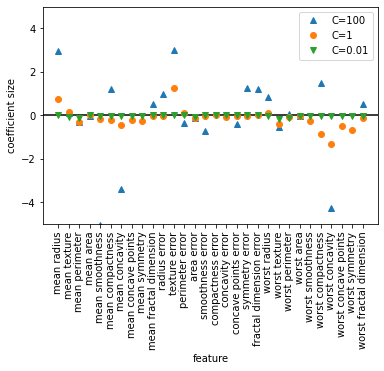

In [46]:
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('coefficient size')
plt.legend()

plt.show()

`LogisticRegression` 클래스는 L2 규제(`solver=l2`)를 기본값으로 적용하므로 `Ridge` 클래스로 만든 모습과 유사합니다. 규제를 강하게 할수록 계수들을 0에 더 가깝게 만들지만 완전히 0이 되지는 않습니다. 참고로 라소는 완전히 0으로 만들 수 있습니다. 

계수를 보면 클래스와 특성의 연관성을 알 수 있습니다. 'texture error' 특성은 악성 샘플과 관련이 깊습니다. 그러나 'worst fractal dimension' 특성은 부호가 바뀌므로 양성 악성 모두의 신호일 수 있습니다.

더 이해하기 쉬운 모델이라면 특성을 더 적게 사용할 가능성이 높은 L1 규제를 사용하는 것이 좋습니다. L1 규제를 사용할 경우의 분류 정확도와 계수 그래프를 그리겠습니다. 사이킷런 0.22 버전부터 `LogisticRegression` 클래스의 `solver` 매개변수 기본값이 `lbfgs`로 바뀌었습니다. 이 알고리즘은 L1 규제를 지원하지 않으므로 L1 규제를 사용하려면 `solver` 매개변수에 `liblinear`로 지정해야 합니다.

C=0.010인 로지스틱 회귀의 훈련 정확도: 0.93
C=0.010인 로지스틱 회귀의 테스트 정확도: 0.93
C=1.000인 로지스틱 회귀의 훈련 정확도: 0.95
C=1.000인 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 로지스틱 회귀의 훈련 정확도: 0.97
C=100.000인 로지스틱 회귀의 테스트 정확도: 0.97


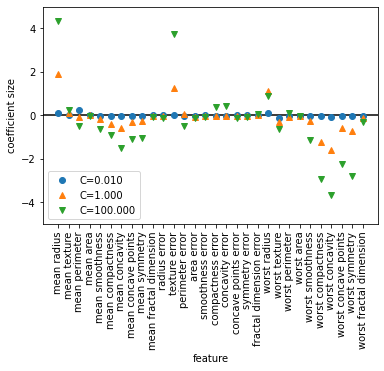

In [47]:
for C, marker in zip([0.01, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', max_iter=1000).fit(X_train, y_train)
    print('C={:.3f}인 로지스틱 회귀의 훈련 정확도: {:.2f}'.format(
        C, lr_l1.score(X_train, y_train)))
    print('C={:.3f}인 로지스틱 회귀의 테스트 정확도: {:.2f}'.format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('feature')
plt.ylabel('coefficient size')
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

이진 분류에서 선형 모델과 회귀에서 선형 모델 사이에는 유사점이 많습니다. 회귀에서처럼 모델들의 주요 차이는 규제에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 `penalty` 매개변수입니다(사이킷런 0.22 버전부터는 `solver` 매개변수로 바뀌었습니다).

### **2.3.3.6. 다중 클래스 분류용 선형 모델**

로지스틱 회귀의 경우 **소프트맥스(softmax)** 함수를 사용한 다중 클래스 분류 알고리즘을 지원하고, 많은 선형 분류 모델은 이진 분류만 지원합니다. 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 **일대다(one-vs.-rest, one-vs.-all)** 방법입니다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시키므로 클래스의 수만큼 이진 분류 모델이 만들어지며, 모든 이진 분류기가 작동하면서 가장 높은 점수를 가지는 분류기의 클래스를 예측값으로 선택합니다.

클래스별 이진 분류기를 만들면 각 클래스가 계수 벡터($w$)와 절편($b$)을 갖게 되며, 분류 신뢰도를 나타내는 다음 공식의 결괏값이 가장 높은 클래스가 해당 데이터의 클래스 레이블로 할당됩니다. 절편($b$)은 무조건 하나만 가집니다.

$$w[0] \times x[0] + w[1] \times x[1] + \cdots + w[p] \times x[p] + b$$

다중 클래스 로지스틱 회귀 이면의 수학은 일대다 방식과 다르지만 클래스마다 계수 벡터와 절편을 만드는 것은 같으며 예측 방법도 같습니다.

`LogisticRegression` 클래스와 `LinearSVC` 클래스에 있는 `multi_class` 매개변수의 기본값은 일대다를 의미하는 `ovr`입니다. 사이킷런 0.20 버전에서 이 매개변수 옵션에 `auto`가 추가되었는데, 이 `auto`로 지정하면, 이진 분류이거나 `solver` 매개변수 값이 `liblinear`이면 자동으로 `ovr`을 선택하고, 그 외에는 자동으로 `multinomial`을 선택합니다. 사이킷런 0.22 버전부터는 `multi_class` 매개변수의 기본값이 `ovr`에서 `auto`로 바뀌었습니다.

다중 클래스 로지스틱 회귀 공식은 아래와 같습니다.

$$Pr(Y_i=c)=\frac{e^{w_c \cdot X_i}}{\displaystyle\sum_{k=1}^K e^{w_k \cdot X_i}}$$

i번째 샘플 $X_i$의 출력 $Y_i$가 클래스 $c$일 확률 $Pr(Y_i=c)$는 클래스 K개에 대한 각각의 계수 $W$를 샘플에 곱해서 지수함수를 적용한 합으로 클래스 $c$에 대한 값을 나누어 계산합니다. 보통 소프트맥스 함수의 표현에서 수식을 간소화하기 위해 절편($b$)은 계수 벡터($W$)에 포함된 것으로 나타냅니다. 즉 다중 클래스 로지스틱 회귀에도 클래스마다 계수 벡터와 절편이 있습니다.

클래스 3개를 가진 2차원 데이터셋에 일대다 방식을 적용하겠습니다. 각 클래스의 데이터는 **정규분포(가우스안 분포)**를 따릅니다.

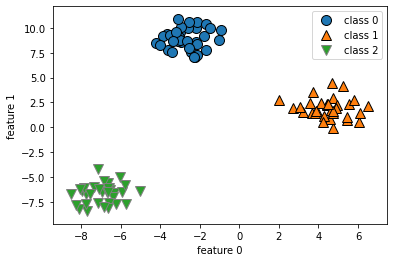

In [48]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

클래스 별로 잘 모여있습니다.

이 데이터셋으로 `LinearSVC` 분류기를 훈련하겠습니다.

In [49]:
linear_svm = LinearSVC().fit(X, y)
print('계수 배열 크기: ', linear_svm.coef_.shape)
print('절편 배열 크기: ', linear_svm.intercept_.shape)

계수 배열 크기:  (3, 2)
절편 배열 크기:  (3,)


계수의 경우 행은 클래스 3개에 각각 대응하는 계수 벡터를 의미하며, 열은 각 특성에 따른 계수 값(이 데이터셋은 특성이 2개)을 의미합니다. 절편의 경우 1차원 벡터입니다.

이진 분류기 3개가 만드는 경계를 시각화하겠습니다.

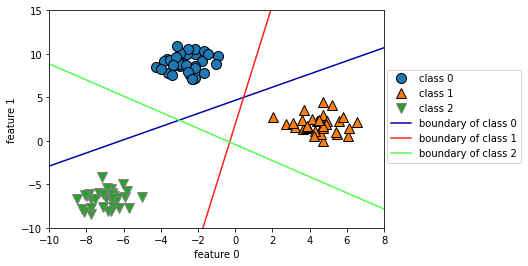

In [50]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'boundary of class 0', 'boundary of class 1', 'boundary of class 2'], loc=(1.01, 0.3))

plt.show()

클래스 0에 속한 샘플은 클래스 0의 구분선 위에 위치하며, 이는 이진 분류기가 만든 클래스 0 공간에 위치하는 것입니다. 그러나 클래스 2의 구분선의 위에 위치하기도 하여 이진 분류기에 의해 나머지로 분류됩니다. 아울러 클래스 1의 구분선의 좌측에 위치하기도 하여 이 또한 이진 분류기에 의해 나머지로 분류됩니다. 따라서 이 공간의 어떤 샘플이든 클래스 0으로 분류할 것으로 예상합니다. 따라서 클래스 0 분류 신뢰도는 0보다 크고, 다른 두 클래스는 0보다 작을 것입니다.

그러나 중앙에 위치한 삼각형 공간의 경우 모두 나머지로 분류했으므로 이곳에 위치한 샘플은 분류 공식의 결과가 가장 높은 클래스로 예측될 것입니다. 직선에 가장 근접한 클래스로 예측한다는 의미입니다.

2차원 평면의 모든 샘플에 대한 예측 결과를 그려보겠습니다. 일대다 분류기 3개가 만든 다중 클래스 결정 경계를 나타냅니다.

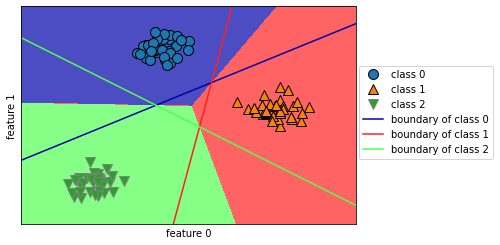

In [51]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'boundary of class 0', 'boundary of class 1', 'boundary of class 2'], loc=(1.01, 0.3))

plt.show()

### **2.3.3.7. 장단점과 매개변수**

선형 모델의 주요 매개변수는 회귀 모델의 경우 `alpha`이고, 분류의 경우 `C`입니다. `alpha` 값은 클수록, `C` 값은 작을수록 모델이 단순해집니다. 보통 두 매개변수는 로그 스케일(자릿수가 바뀌도록 10배씩 변경하는데 0.001, 0.01, 0.1, 1, 10, 100...)로 최적치를 정합니다.

그리고 L1 또는 L2 규제를 사용할지 정합니다. 중요한 특성이 많지 않거나 특성을 줄이려면  L1 규제, 중요한 특성이 많으면 L2 규제를 사용합니다. L1을 사용하면 특성을 조금만 사용하므로 모델을 분석하기 용이합니다. 중요한 특성이 무엇인지, 그 영향은 어느 정도인지 파악하기 쉽습니다.

선형 모델은 학습 속도가 빠르고 예측도 빠릅니다. 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동합니다. 대용량 데이터셋이라면 기본 설정보다 빨리 처리하도록 `LogisticRegression` 클래스와 `Ridge` 클래스의 `solver` 매개변수에 `'sag'`(사이킷런 0.19 버전으로 업데이트 하면서 성능을 개선한 `saga`가 추가됐습니다)를 지정합니다. `sag`는 **Stochastic Average Gradient descent(확률적 평균 경사 하강법)**의 약자로, 일반적인 경사 하강법과 비슷하지만 반복이 진행될 때 이전에 구한 모든 경사의 평균을 사용해서 계수를 갱신합니다. 

다른 방법으로는 선형 모델의 대용량 처리 버전으로 구현된 `SGDClassifier` 클래스와 `SGDRegressor` 클래스를 사용합니다. **SGD**는 **Stochastic Gradient Descent(확률적 경사 하강법)**의 약자입니다.

선형 모델이 가진 다른 장점은 회귀와 분류에서 공식을 토대로 만들어진 예측에 대해 비교적 쉽게 이해할 수 있다는 점입니다. 다만 데이터 특성들이 서로 깊게 연관될수록 계수 값에 대해 설명하기 어렵고 분석하기도 어렵습니다.

선형 모델은 샘플보다 특성이 더 많을 때 잘 작동하고, 다른 모델로 학습하기 어려운 큰 데이터셋에 선형 모델을 많이 사용합니다. 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋으므로 선형 모델을 우선 시도하지 않습니다. 뒤에서 SVM에서 선형 모델이 실패하는 예를 살펴볼 예정입니다.

선형 모델 파트를 마무리하기 전에 **메서드 연결(method chaining)**에 대해 설명하겠습니다. 메서드 호출을 잇는 것(여기서는 `__init__`와 `self`)을 의미합니다. `__init__`은 객체가 생성될 때 자동으로 호출되는 특수한 메서드(생성자)이며, `self`는 호출된 메서드를 정의한 객체 자신을 의미합니다.

모든 사이킷런의 `fit()` 메서드는 학습된 모델인 `self`를 반환하고 이를 변수 `logreg`에 할당합니다.

```
logreg = LogisticRegression().fit(X_train, y_train)
```

`fit()` 메서드와 `predict()` 메서드를 한 줄에 쓰는 메서드 연결도 자주 사용합니다. 모델의 객체를 만들고 훈련하고 예측하는 일을 한 줄로 잇습니다.

```
logreg = LogisticRegression()

y_pred = logreg(X_train, y_train).predict(X_test)

y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
```

물론 이런 방식은 코드를 읽기 어려워지므로 바람직하지 않습니다. 더구나 학습된 로지스틱 회귀 모델은 변수에 할당되지 않으므로(예측값을 가진 변수만 남으므로) 다른 데이터에 대해 예측하거나 만들어진 모델을 분석할 수 없습니다.

## **2.3.4. 나이브 베이즈 분류기**

**나이브 베이즈(naive bayes)** 분류기는 선형 모델과 매우 유사합니다. `LogisticRegression` 클래스와 `LinearSVC` 클래스보다 훈련 속도가 빠르지만 일반화 성능이 약간 떨어집니다. 텍스트 분류에서 널리 사용하는 알고리즘으로서 이메일 스팸 필터링에 적용하여 큰 인기를 얻었습니다. 

나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해서 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문입니다. 나이브 베이즈 분류기의 종류는 아래 3가지입니다.

- `GaussianNB` : 연속적 데이터에 적용할 수 있습니다.
- `BernoulliNB` : 이진(이산적) 데이터에 적용할 수 있습니다.
- `MultinomialNB` : 이진(이산적) 데이터이면서 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예컨대 문장에 나타난 단어의 횟수임)에 적용할 수 있습니다.

`BernoulliNB` 클래스와 `MultinomialNB` 클래스는 주로 텍스트 데이터를 분류할 때 사용합니다.

`BernoulliNB` 클래스는 각 클래스의 특성 중에 0이 아닌 것이 몇 개인지 셉니다.

In [52]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

이진 특성을 가진 샘플 4개가 있고 클래스는 0과 1입니다. 출력 y의 첫 번째와 세 번째 클래스는 0입니다. 첫 번째 특성은 0이 두 번이고 0이 아닌 것은 한 번도 없습니다. 두 번째 특성은 0이 한 번이고 1도 한 번입니다. 같은 방식으로 두 번째 클래스에 해당하는 샘플도 계산합니다.

클래스별로 0이 아닌 원소를 세는 과정을 요약하겠습니다. 클래스 값이 0이나 1이므로 1이 나타난 횟수를 세면 특성의 값을 모두 더한 게 됩니다.

In [53]:
counts = {}

for label in np.unique(y):
    print(label)
    # 각 클래스에 대해 반복합니다. 특성마다 1이 나타난 횟수를 더합니다.
    # `axis`를 0로 지정하면 행을 기준으로 더합니다. 특성마다 아래로 더한다는 의미입니다.
    # `axis`를 1로 지정하면 열을 기준으로 더합니다. 샘플 전체 값을 (오른쪽으로) 더한다는 의미입니다.
    counts[label] = X[y == label].sum(axis=0)
    # True에 속한 행을 추출합니다.
    print(X[y == label])
    print(counts[label])
    print()
print('특성 카운트: ', counts)

0
[[0 1 0 1]
 [0 0 0 1]]
[0 1 0 2]

1
[[1 0 1 1]
 [1 0 1 0]]
[2 0 2 1]

특성 카운트:  {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


클래스 0인 경우, 즉 첫 번째, 세 번째 행에서 1이 나타난 횟수를 행(`axis=0`)을 따라 더하면 [0, 1, 0, 2]이 되며, 클래스 1인 경우 두 번째, 네 번째 행에서 1이 나타난 횟수를 행을 따라 더하면 [2, 0, 2, 1]이 됩니다.

`multinomialNB` 클래스는 클래스별로 특성의 평균을 계산하고, `GaussianNB` 클래스는 특성의 표준편차와 평균을 계산합니다. 예측할 땐 샘플을 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 정합니다.

`multinomialNB` 클래스와 `BernoulliNB` 클래스의 예측 공식은 선형 함수처럼 샘플에 `coef_`를 곱하고 `intercept_`를 더하는 방식과 같습니다. 다만 나이브 베이즈 모델의 `coef_`는 (기울기 $w$가 아닌) 특성 카운트 수를 로그 변환한 형태이고, `intercept_`는 클래스 카운트 수를 로그 변환한 것입니다.

### **2.3.4.1. 장단점과 매개변수**

`GaussianNB`는 매우 고차원인 데이터셋에 사용합니다.

`MultinomialNB`와 `BernoulliNB`는 모델 복잡도를 조절하는 `alpha` 매개변수를 가집니다. `alpha`가 주어지면 알고리즘이 양의 값을 가진 가상의 샘플을 모든 특성에 `alpha` 개수만큼 추가하여 통계 데이터를 완만하게 합니다. `alpha` 값이 클수록 더 완만해지고 모델 복잡도는 낮아집니다. `alpha`에 따른 알고리즘 성능 변화는 크지 않아서 이 값 자체가 성능 향상에 크게 좌우하진 않지만 어느 정도 정확도는 제고할 수 있습니다. 이 두 베이즈 모델은 텍스트 같은 희소한 데이터를 세는 데 사용하며, 보통 0이 아닌 특성이 많은 데이터셋(큰 문서 같은 것들)에서 `MultinomialNB` 클래스가 `BernoulliNB`클래스보다 성능이 좋습니다.

나이브 베이즈 모델과 선형 모델의 장단점은 비슷합니다. 훈련과 예측 속도가 빠르고 훈련 과정을 이해하기 쉽습니다. 희소하고 고차원인 데이터셋에서 잘 작동하며 매개변수에 비교적 민감하지 않습니다. 선형 모델을 사용해서 학습 시간이 오래 걸리는 큰 데이터셋에는 나이브 베이즈 모델이 적합할 수 있고 실제로도 자주 사용합니다.

간략하게 다루는 정도로 마무리하겠습니다. 더 자세한 내용은 [링크](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98-Naive-Bayes-Classification)를 참고하시기 바랍니다.

## **2.3.5. 결정 트리**

**결정 트리(decision tree)**는 분류, 회귀 모두 널리 사용하는 모델이며 예/아니오로 된 연속적인 질문을 던지면서 결정을 향해 다다르는 학습 방식을 취합니다. 스무고개 같다고 볼 수 있습니다.

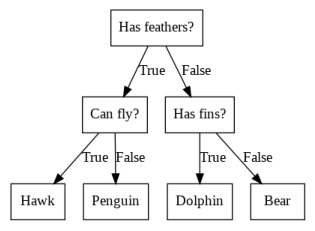

In [54]:
mglearn.plots.plot_animal_tree()

**노드(node)**는 질문이나 정답을 가진 네모이며, 맨 위의 첫 번째 노드는 **루트 노드(root node)**, 맨 아래의 마지막 노드는 **리프 노드(leaf node)**라고 부릅니다. **에지(edge)**는 질문의 답과 다음 질문을 연결하는 화살표선입니다.

### **2.3.5.1. 결정 트리 만들기**

각 샘플이 50개씩 있는 2차원 데이터셋을 분류하는 결정트리를 만들겠습니다. 정답에 가장 빨리 도달하는 예/아니오로 이뤄진 질문 목록을 학습하는 과정이 결정 트리를 학습하는 과정입니다. 이런 질문들을 테스트(테스트 세트와 다른 의미)라고 부릅니다. 보통 데이터는 예/아니오로 구분되지 않고 연속된 특성으로 구분되므로 어떤 특성이 어떤 특성의 값보다 (같거나)큰지 작은지와 같은 형식으로 테스트 합니다.

<img src='https://drive.google.com/uc?export=view&id=1BMSrD9BcAjMrVZW4N6GVY0yr7KStXSq0' width = 50% >

가능한 한 모든 테스트에서 타깃값에 대해 가장 많은 정보를 가진 것을 고릅니다. 데이터셋을 X[1]=0.06에서 수평적으로 나누는 것이 가장 많은 정보를 포함합니다. 이 직선이 클래스 0과 클래스 1에 각각 속한 샘플을 가장 잘 나눕니다. 맨 위에 위치한 루트노드는 클래스 0과 클래스 1에 각각 속한 샘플 50개를 나타냅니다([클래스0의 개수, 클래스1의 개수]). 테스트 X[1]<=0.06를 통과하면 왼쪽 노드, 통과하지 못하면 오른쪽 노드로 갑니다. 그림에서 아랫부분이 왼쪽 노드, 윗부분이 오른쪽 노드를 나타냅니다. 첫 번째 분류 시도가 두 클래스를 완벽하게 구분하지 못했으므로 각각 클래스가 양쪽 노드에 포함됩니다.

<img src='https://drive.google.com/uc?export=view&id=1BG88SYxELbjWOs7JdiTal0OIX6_0abVs' width = 70% >

테스트를 반복하면 그림처럼 구간을 더 나눕니다.

<img src='https://drive.google.com/uc?export=view&id=1q2U9Dv4ICIK1rxi5bRbs94xc475pVQAr' width = 70% >

테스트를 반복하면 각 노드가 테스트를 하나씩 가진 이진 결정 트리를 계속 만듭니다. 그림으로 설명하면 각 테스트는 축을 따라 데이터를 둘로 나눠갑니다. 이를 계층적으로 영역을 분할하는 알고리즘으로 적용할 수 있습니다. 각 테스트는 특성 하나로만 진행되므로 나뉜 영역은 항상 축에 평행한 형태를 취합니다. 이런 식으로 진행하면서 각 분할된 영역에 타깃값이 하나만 남을 때까지 반복합니다. 즉 결정 트리의 리프 노드에 클래스나 회귀 분석 결과가 하나만 남을 때까지 반복합니다. 타깃이 하나만 남은 리프 노드를 **순수 노드(pure node)**라고 합니다. 순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는 것을 의미합니다. 물론 바람직한 결과라고 볼 수 없습니다.

<img src='https://drive.google.com/uc?export=view&id=1Hsywnh2gmyVIhiP5auyZoNawL3642MBK' width = 70% >

결론적으로 특성을 분할한 영역들 중 어느 곳에 위치하는지 확인하고 그 영역의 타깃값 중에 다수이거나 하나인 것을 예측 결과로 삼습니다. 회귀의 경우는 리프 노드에 위치한 훈련 데이터의 평균값이 예측 결과가 됩니다.

### **2.3.5.2. 결정 트리의 복잡도 제어하기**

모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합 됩니다. 바로 위 그래프가 클래스 0이 클래스 0 영역에 모두 속하며 과대적합 된 것을 보여줍니다. 결코 바람직한 결정 경계가 아닙니다. 결정 경계가 클래스의 샘플들에서 멀리 떨어진 **이상치(coulier)** 하나에 너무 민감하기 때문입니다.

과대적합을 막는 방법은 두 가지입니다. **사전 가지치기(pre-pruning)**로 트리 생성을 일찍 중단합니다. 트리의 최대 깊이나 리프의 최대 개수를 제한하거나, 노드가 분할하기 위한 샘플의 최소 개수를 정합니다.

**사후 가지치기(post-pruning)** 또는 **가지치기(pruning)**로 트리 생성을 마친 후에 샘플이 적은 노드를 삭제하거나 병합하는 방법입니다. 사이킷런 0.22 버전에서 비용 복잡도 기반의 사후 가지치기를 위한 `ccp_alpha` 매개변수가 추가됐습니다.

결정 트리는 회귀 버전인 `DecisionTreeRegression` 클래스, 분류 버전인 `DecisionTreeClassifier` 클래스에 구현되어 있습니다. 

유방암 데이터셋을 사용하여 사전 가지치기 효과를 확인하겠습니다.

In [55]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


훈련 세트 점수가 1입니다. 가지치기를 통해 트리 깊이를 제한하지 않으면 트리는 무한대로 깊어지고 복잡해집니다. 과대적합 되기 쉽고 새로운 데이터에 일반화되기 어렵습니다.

사전 가지치기를 적용하기 위해 매개변수 `max_depth`에 값을 지정해서 트리 깊이를 제한하겠습니다. 일정 깊이까지만 트리가 자라도록 사전에 조치하는 것입니다.

In [56]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


꽤 괜찮은 점수를 얻었습니다.

### **2.3.5.3. 결정 트리 분석**

트리 모듈의 `export_graphviz` 메서드를 사용하여 그래프 저장용 텍스트 파일 포맷인 `.dot` 파일을 생성하고, 생성한 파일을 토대로 트리를 시각화해보겠습니다. 각 노드에서 다수인 클래스를 색으로 나타내기 위해 `filled=True`로 매개변수를 지정하고 적절히 레이블 되도록 클래스 이름과 특성 이름을 `feature_names=cancer.feature_names`로 매개변수를 지정하겠습니다.

In [57]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'],
                 feature_names=cancer.feature_names, impurity=False, filled=True)

`tree.dot`로 생성한 파일을 `graphviz` 모듈을 사용하여 시각화하겠습니다.

참고로 `plot_tree()` 메서드를 사용하면 더 편리합니다. `.dot` 파일을 생성하지 않고 바로 트리를 그릴 수 있습니다. `export_graphviz()` 메서드에서 지정한 매개변수인 `class_names`, `feature_names`, `impurity`, `filled`를 모두 지원하기도 합니다.

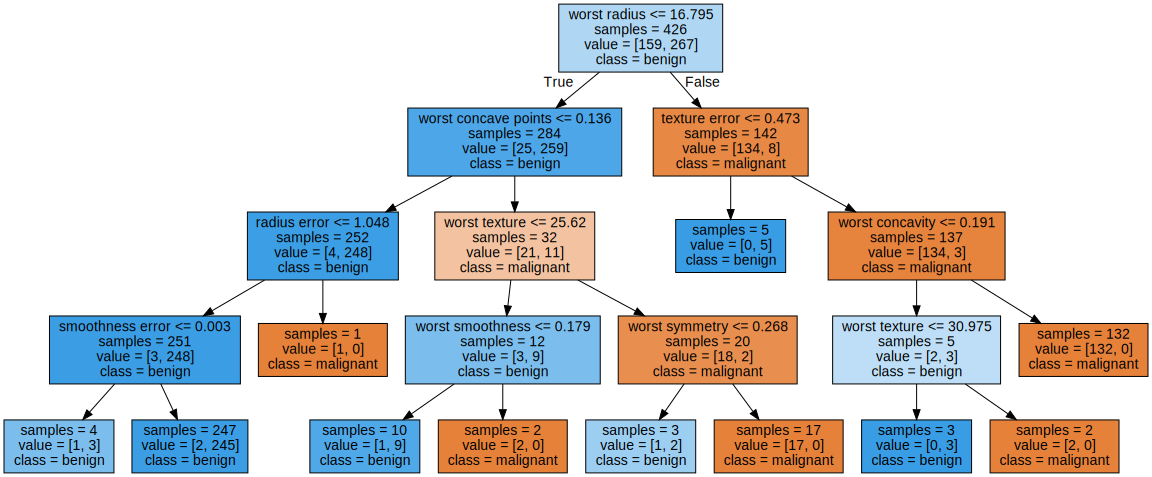

In [58]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

이진 트리이므로 깊이가 1씩 증가하면 그래프 너비는 2배씩 커집니다. 시각화하더라도 트리가 많이 깊어지면 분석하기에 어렵습니다.

각 노드가 가진 정보를 순서대로 나열하면 아래와 같습니다.

- 샘플을 나눌 조건문
- 노드가 가진 샘플 개수
- value = [malignant 개수, benign 개수]   
여기서 malignant는 1(positive), benign은 0(negative)
- 다수 클래스

### **2.3.5.4. 트리의 특성 중요도**

거대한 트리 전체를 일일이 살피기는 쉽지 않습니다. 트리의 작동 방식을 요약한 속성들을 참고하면 트리에 대한 정보를 확인하기 좋습니다. 가장 널리 쓰이는 속성인 **특성 중요도(feature importance)**는 트리 생성에 각 특성이 얼마나 중요한지 평가한 값입니다. 0~1 사이의 숫자로 이루어진 값이며, 0은 특성이 전혀 사용되지 않았다는 것을 의미하고, 1은 타깃 클래스를 정확하게 예측했다는 것을 의미합니다. 특성 중요도의 전체 합은 1입니다. 트리의 특성 중요도를 확인하겠습니다.

In [ ]:
print('특성 중요도: ', tree.feature_importances_)

특성 중요도:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


특성 중요도를 그래프로 시각화하겠습니다.

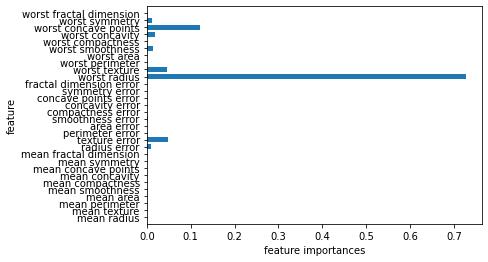

In [59]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importances')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

첫 번째 노드에서 사용한 특성('worst radius')이 가장 중요한 특성으로 나타나는데, 이 특성이 첫 번째 노드에서 두 클래스를 매우 잘 나누고 있다는 점을 가리킵니다. 그러나 특성 중요도가 낮은 특성이라고 반드시 유용하지 않다는 의미는 아닙니다. 다른 특성이 동일한 정보를 가지고 있어서 트리가 그 특성을 선택하지 않았을지도 모릅니다. 

선형 모델의 계수와 달리 특성 중요도는 항상 양수입니다. 그리고 특성이 어떤 클래스를 지지하는지는 알 수 없습니다. 'worst radius'를 중요한 특성이라고 하지만 양성인지 악성인지는 알 수 없다는 의미입니다. 특성과 클래스는 단순한 관계가 아닐 수도 있습니다.

아래에서 이 점을 확인해보겠습니다.

Feature importances: [0. 1.]


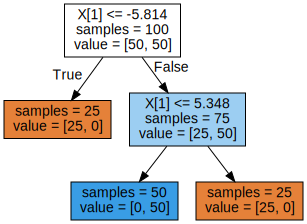

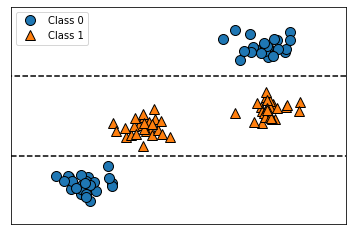

In [62]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

위 그래프는 y축 특성과 클래스 레이블 간의 복합적인 관계를 가지고 있는 2차원 데이터셋과 결정 트리가 만든 결정 경계를 나타냅니다. 그래프에 표시되지 않았으나 x축은 X[0]이고 y축은 X[1]입니다.

위 결정 트리 그림은 특성 2개와 클래스 2개를 가진 데이터셋으로 만들었습니다. X[1]에 있는 정보만 사용했고 X[0]은 전혀 사용하지 않았습니다. 그러나 X[1]과 출력 클래스는 비례하거나 반비례하는 관계가 아닙니다. X[1]의 값이 높으면 클래스 0이고 낮으면 1이라고 말할 수 없습니다. 그 반댓값도 마찬가지입니다. 이는 회귀에 대한 결정 트리도 해당되는 설명입니다. 분류에 대한 결정 트리처럼 사용법과 분석이 매우 비슷하기 때문입니다.

그러나 모든 트리 기반 회귀 모델을 사용할 때 유의할 점은 **외삽(extrapolation)**이라는 속성, 즉 훈련 데이터 범위 밖의 샘플은 전혀 예측할 수 없다는 사실입니다.

컴퓨터 메모리 가격 동향 데이터셋을 사용하여 위 내용을 자세히 살피겠습니다. 먼저 데이터를 사용하여 그래프를 그리겠습니다.

     Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
328         328  2015.58  4.500000e-03
329         329  2015.67  4.300000e-03
330         330  2015.75  4.200000e-03
331         331  2015.83  3.800000e-03
332         332  2015.92  3.700000e-03

[333 rows x 3 columns]


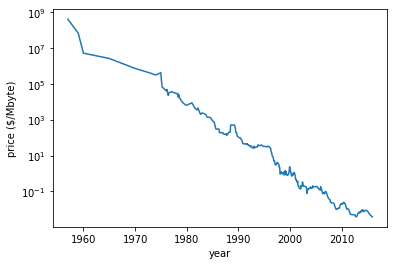

In [80]:
import os
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
print(ram_prices)

plt.yticks(fontname='Arial')
# 맷플롯립의 `semilogy()` 메서드를 사용하여 y축을 로그스케일로 변환하여 그립니다.
# 데이터 자체는 로그스케일로 변환되지 않습니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price ($/Mbyte)')

plt.show()

x축은 날짜, y축은 램 가격입니다. y축을 로그 스케일로 그리면 굴곡이 조금 생기는 점 외에는 선형적으로 나타나서 예측하기에 비교적 쉽습니다.

이번에는 날짜 특성만으로 2000년 전까지의 데이터를 사용하여 2000년 후 가격을 예측하겠습니다. 모델을 훈련하고 예측을 수행한 뒤에 로그 스케일을 원래대로 되돌리기 위해 지수 함수를 사용하겠습니다. 사용할 도구는 `DecisionTreeRegressor` 클래스와 `LinearRegression` 클래스입니다. 그래프를 표현하고자 전체 데이터셋에 예측을 수행했지만 테스트 데이터셋과의 비교를 중점으로 살피겠습니다. 

In [84]:
from sklearn.tree import DecisionTreeRegressor

# 2000년 이전은 훈련 데이터, 2000년 이후는 테스트 데이터로 지정합니다.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측에 날짜 특성만 사용합니다.
# 넘파이 `newaxis` 메서드로 배열에 축을 추가합니다. 차원을 늘리는 용도입니다.
# 차원을 늘리지 않으면 1차원 배열입니다. 훈련 데이터는 2차원 배열이어야 합니다.
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해 수행합니다.
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

실제 값과 결정 트리, 선형 회귀의 예측값을 비교하는 그래프를 그리겠습니다.

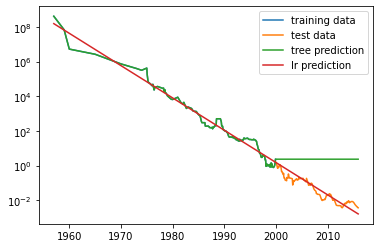

In [85]:
plt.semilogy(data_train.date, data_train.price, label='training data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='lr prediction')
plt.legend()

plt.show()

선형 모델은 훈련 데이터와 테스트 데이터에 있는 미세한 굴곡을 직선 형태로 근사하여 2000년 이후인 테스트 데이터를 꽤 정확하게 예측했습니다.

트리 모델은 트리 복잡도에 제한을 두지 않았으므로 훈련 데이터를 완벽하게 예측했습니다. 다만 모델이 가진 데이터 범위 밖으로 나가면 그저 마지막 샘플만을 토대로 예측할 뿐입니다. 위에서 서술했듯이 트리 모델은 데이터를 벗어난 새로운 데이터를 예측할 능력이 없습니다. 모든 트리 모델의 단점입니다. 

물론 트리 기반 모델로 좋은 예측을 할 수도 있습니다. 예컨대 가격이 오르거나 내릴지를 예측하는 것입니다. 위 예제는 트리 기반 모델이 시계열 데이터에 적합하지 않다는 점과 트리가 어떻게 예측을 만드는지 그 특성을 보여주는 것을 목적으로 했습니다.

### **2.3.5.5. 장단점과 매개변수**

사전 가지치기와 관련된 매개변수는 아래와 같습니다. 이 매개변수 중에 하나만 적절하게 지정해도 과대적합을 방지하기에 충분합니다.

- `max_depth`: 최대 깊이를 지정하는 매개변수입니다.

- `max_leaf_nodes`: 리프 노드의 최대 개수를 지정하는 매개변수입니다.

- `min_smaples_leaf`: 리프 노드가 되기 위한 최소한의 샘플 개수를 지정하는 매개변수입니다.

- `min_samples_split`: 노드가 분기할 수 있는 최소 샘플 개수를 지정하는 매개변수입니다.

- `min_impurity_decrease`: 분할로 얻어질 불순도(impurity) 감소 최솟값을 지정하는 매개변수입니다.

결정 트리가 다른 알고리즘보다 나은 점은 2가지입니다. 첫째로, 시각화하기에 용이하여 비전문가를 이해시키기 수월합니다. 물론 트리 크기가 크지 않다는 것을 전제로 합니다. 둘째로, 어떤 데이터 스케일이든 무관하게 사용할 수 있습니다. 각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 전혀 받지 않습니다. 특성의 스케일이 서로 다르거나 이진 특성과 연속적 특성이 섞인 데이터에도 잘 작동합니다. 따라서 특성 정규화나 표준화 같은 전처리가 필요하지 않습니다. 

물론 단점도 존재합니다. 사전 가지치기를 해도 과대적합이 되는 경향이 있어서 일반화 성능은 좋지 않습니다. 다음 파트에서 서술하는 앙상블 방법을 결정 트리의 대안으로 흔하게 사용합니다.

여기까지 정제 작업을 마쳤습니다.

---



## **2.3.6. 결정 트리의 앙상블**

**앙상블(ensemble)**은 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법입니다. **랜덤 포레스트(random forest)**와 **그레이디언트 부스팅(gradient boosting)**이 매우 효과적인 모델이며 두 모델 모두 기본으로 결정 트리를 사용합니다.

### **2.3.6.1. 랜덤 포레스트**

랜덤 포레스트는 결정 트리의 주요 단점인 훈련 데이터에 대한 과대적합을 방지하는 방법입니다. 조금씩 다른 여러 결정 트리의 묶음인데, 각 트리는 비교적 에측을 잘할 수 있지만 데이터 일부에 과대적합하는 경향이 있다는 점에 기초하여 만들어졌습니다. 예를 들면 작동은 잘 하지만 서로 다른 방향으로 과대적합 된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합 된 양을 줄일 수 있습니다. 이런 방식으로 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어듭니다.

이 방법이 유효하려면 결정 트리를 많이 만들어야 하는데, 각각의 트리는 타깃 예측을 잘하는 것은 기본이고 다른 트리와는 구별되어야 합니다. 따라서 트리를 생성할 때 각각의 트리들이 완전히 독립적이며 다른 형태를 취하도록 무작위성을 주입합니다. 방법은 두 가지입니다.

- 데이터 포인트를 무작위로 선택합니다.

- 분할 테스트에서 특성을 무작위로 선택합니다.

#### **2.3.6.1.1. 랜덤 포레스트 구축**

먼저 `RandomForestRegressor`와 `RandomForestClassifier`의 `n_estimators`(사이킷런 0.22 버전부터 기본값이 10에서 100으로 바뀝니다) 매개변수 값에 생성할 트리의 개수를 정해야 합니다. 그리고 **부트스트랩 샘플(bootstrap sample)**을 생성합니다. `n_samples`개의 데이터 포인트 중에서 데이터를 `n_samples` 횟수만큼 반복 추출합니다(한 샘플이 여러 번 중복 추출될 수 있습니다). 이 데이터셋은 원래 데이터셋 크기와 동일하지만 어떤 데이터 포인트는 누락될 수도 있고(대략 3/1) 어떤 데이터 포인트는 중복될 수 있습니다(샘플 100개 중에 어떤 샘플 하나가 선택되지 않을 확률은 $\frac{99}{100}$이고, 뽑은 샘플을 제외하지 않고 100번 반복할 때 한 번도 선택되지 않을 확률은 $(\frac{99}{100})^{100} = 0.366$입니다).

그 다음 이렇게 만든 데이터셋으로 결정 트리를 만듭니다. 

#### **2.3.6.1.2. 랜덤 포레스트 분석**

two_moon 데이터셋으로 트리 5개로 구성된 랜덤 포레스트 모델을 만듭니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

랜덤 포레스트 안에 만들어진 트리는 `estimators_` 속성에 저장됩니다.

각 트리에서 학습된 결정 경계와 이를 취합해 만든 결정 경계를 함께 시각화합니다. [raval()](https://rfriend.tistory.com/349) 함수에 대한 설명은 클릭하여 참고 바랍니다. 쉽게 말하면 1차원으로 줄이는 함수입니다.

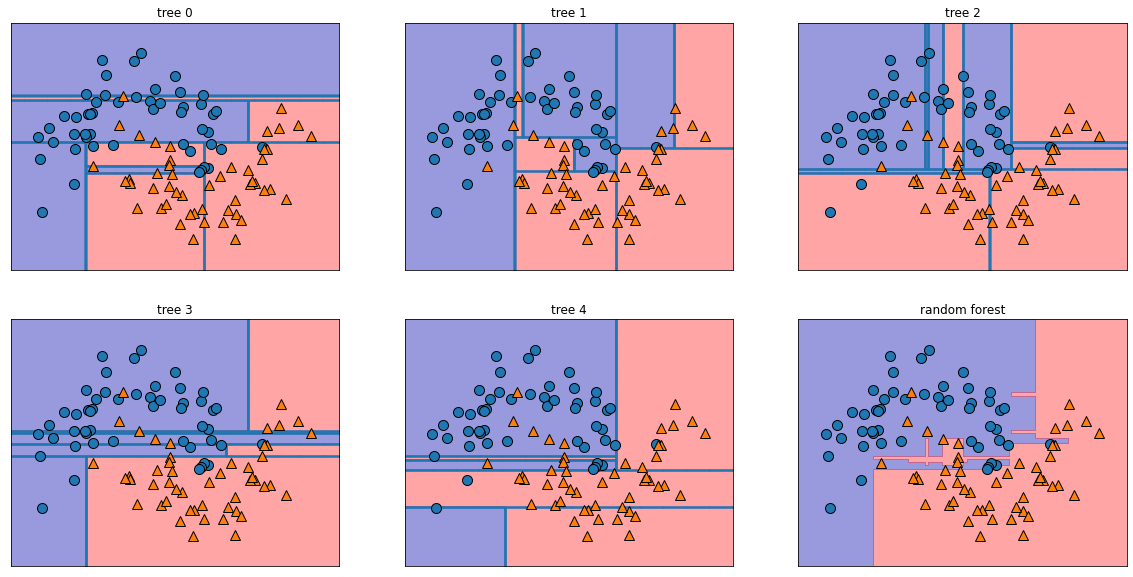

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

트리 다섯 개가 만든 결정 경계가 각각 다릅니다. 부트스트랩 샘플링으로 인해 한쪽 트리에 나타나는 훈련 포인트가 다른 트리에는 포함되지 않을 수 있어서 각 트리는 불완전합니다.

랜덤 포레스트는 개개의 트리보다는 덜 과대적합 되고 훨씬 좋은 경계를 만듭니다. 실제 애플리케이션에서는 수백 수천개 트리를 사용하므로 더 부드러운 결정 경계가 만들어집니다.

유방암 데이터셋에 트리 100개로 이뤄진 랜덤 포레스트를 적용합니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


매개변수를 튜닝하지 않고도 다른 모델보다 정확도가 높은 건 랜덤 포레스트의 강점입니다. 물론 `max_features` 매개변수를 조정하거나 사전 가지치기를 시도할 수도 있습니다.

랜덤 포레스트도 특성 중요도를 제공합니다. 각 트리의 특성 중요도를 취합해서 계산합니다. 트리 하나보다 랜덤 포레스트에서 제공하는 특성 중요도가 더 신뢰할 만합니다

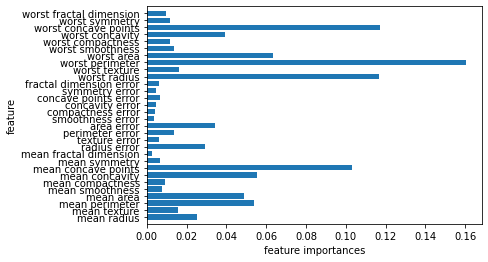

In [ ]:
plot_feature_importances_cancer(forest)

위에서 출력한 단일 결정 트리의 특성 중요도보다 0 이상의 중요도 값이 훨씬 많습니다. 단일 결정 트리처럼 랜덤 포레스트도 'worst radius' 특성의 중요성을 인정하지만 가장 많은 정보를 가진 특성으로 'worst perimeter'를 선택합니다. 랜덤 포레스트를 만드는 무작위성은 알고리즘이 가능성 있는 많은 경우를 고려하도록 하므로 단일 결정 트리보다 데이터를 더 넓게 볼 수 있습니다.

#### **2.3.6.1.3. 장단점과 매개변수**

랜덤 포레스트는 성능이 매우 좋고 매개변수 튜닝을 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없으므로 널리 사용되는 알고리즘입니다. 

단일 결정 트리의 단점을 보완하고 장점은 그대로 취했지만, 의사 결정 과정을 간소하게 표현하려면 단일 결정 트리를 사용할 수 있습니다. 랜덤 포레스트를 통해 생성된 수많은 트리는 단일 결정 트리에 비해 자세하게 분석하기 어렵고 더 많은 특성을 사용하므로 트리 깊이가 더 깊어지기 때문입니다.

데이터셋이 크면 랜덤 포레스트로 모델을 만들 때 시간이 오래 걸리지만 CPU 코어가 많이 확보된 환경이라면 병렬 처리해서 시간을 단축할 수 있습니다. `n_jobs` 매개변수(기본값 `1`)에 사용할 코어 수를 지정할 수 있는데 수를 늘릴수록 속도가 빠릅니다. 코어 2개를 사용하면 처리 속도가 2배가 됩니다. 값을 -1로 지정하면 확보된 모든 코어를 사용합니다. `-1` 값을 추천합니다.

`random_state` 값에 따라 전혀 다른 모델이 만들어집니다. 물론 트리 수가 많을수록 변화가 적지만 같은 결과를 원한다면 무조건 같은 값을 지정해야 합니다.

텍스트 데이터처럼 고차원적이고 희소한 데이터에는 적합하지 않습니다. 이런 데이터에는 선형모델이 적합합니다. 랜덤 포레스트는 선형 모델보다 많은 메모리를 사용하며 훈련 속도와 예측 속도가 느립니다. 속도와 메모리 사용에 제약이 있는 애플리케이션은 선형 모델이 적합합니다.

`max_depth`, `max_leaf_nodes`, `min_samples_leaf`, `min_samples_split` 매개변수로 사전 가지치기를 시도할 수 있습니다(단일 결정 트리와 동일합니다).

`n_estimator` 매개변수 값은 클수록 더 많은 트리를 평균하게 되어 과대적합을 줄이면서 더욱 안정된 모델을 만듭니다. 다만 더 많은 훈련 시간과 메모리가 필요하므로 환경에 적당한 수준을 지정해야 합니다.

`max_features` 매개변수는 각 트리를 얼마나 무작위로 생성할지를 결정하며, 값이 작을수록 과대적합을 줄입니다. 기본값을 쓰는 것을 추천합니다. 분류의 경우 `max_features=sqrt(n_features)`이고, 회귀의 경우 `max_features=n_features`인데 이 두 값 모두 기본값이고 `auto`로 표시되어 있습니다. `max_features`나 `max_leaf_nodes` 매개변수를 추가하면 가끔 성능이 향상되기도 하고 메모리와 처리 시간을 줄일 수도 있습니다.

### **2.3.6.2. 그레이디언트 부스팅 회귀 트리**

그레이디언트 부스팅 회귀 트리는 결정 트리 여러 개를 묶어서 강력한 모델을 만드는 앙상블 모델입니다. 이름에 회귀가 있지만 회귀와 분류 모두에 사용할 수 있습니다(`GradientBoostingClassifier`와 `GradientBoostingRegressor` 모두 `DecisionTreeRegressor`에 기반하여 알고리즘을 구현합니다). 그레이디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성합니다. 즉 무작위성이 없지만 강력한 사전 가지치기를 시전합니다. 보통 1~5개만큼 깊지 않은 트리를 사용하므로 필요한 메모리가 적고 속도도 빠릅니다. 얕은 트리 같은 간단한 모델(약한 학습기(weak learner))을 많이 연결하는 메커니즘입니다. 각각의 트리는 데이터 일부에만 예측을 잘 수행하므로 많은 트리를 추가할수록 성능이 좋아집니다. 다시 말하면 이전에 생성한 트리의 예측과 타깃값 사이의 오차를 줄이면서 새로운 트리를 추가합니다. 손실 함수를 정의하고 **경사 하강법(gradient descent)**을 사용해서 추가될 트리가 예측할 값을 보정하며 확장합니다.

업계에서 널리 사용하고 대회에서도 강력한 모델 중 하나입니다. 랜덤 포레스트보다는 매개변수 지정에 민감한 편이지만 적절하게 조정하면 더 좋은 정확도를 보여줍니다.

`learning_rate`는 이전 트리의 오차를 얼마나 강하게 보정할 것인지 학습률을 지정하는 매개변수입니다. 학습률이 클수록 보정을 강하게 하므로 더 복잡한 모델을 생성합니다.

`n_estimators` 매개변수에 높은 값을 지정하면 앙상블에 더 많은 트리를 추가하여 모델 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 많아집니다.

유방암 데이터셋을 사용해서 `GradientBoostingClassifier` 클래스를 적용합니다. 기본값인 깊이(`max_depth`)가 3인 트리 100개, 학습률(`learning_rate`) 0.1을 적용합니다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


훈련 세트 정확도가 100%인 것은 과대적합을 의미하므로 사전 가지치기를 통해 트리의 최대 깊이를 줄이거나 학습률을 낮추는 조치를 취해야 합니다.

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print('훈련 세트 정확도: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


두 방식을 사용하여 모델 복잡도를 감소시키면서 훈련 세트 정확도를 낮췄고, 트리 깊이를 제한하면서 테스트 세트 정확도가 향상됐습니다.

특성 중요도를 시각화합니다.

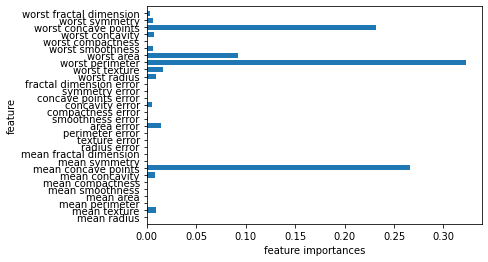

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

랜덤 포레스트와 비슷한 특성을 강조하지만 그레이디언트 부스팅은 일부 특성을 완전하게 무시하는 경향을 보입니다.

보통 더 안정적인 랜덤 포레스트를 추구하지만 예측 시간이 중요하거나 마지막 성능까지 내야 하는 상황에서는 그레이디언트 부스팅을 사용하면 도움이 될 수 있습니다.

대규모 머신러닝 문제에 그레이디언트 부스팅을 적용하려면 `xgboost`(https://xgboost.readthedocs.io/) 패키지와 파이썬 인터페이스를 검토하는 것을 권장합니다. 그레이디언트 부스팅을 구현하는 것보다 빠르고 튜닝하기도 쉽습니다. 참고로 `xgboost`는 널리 쓰이는 매우 강력한 모델입니다.

또 다른 인기 라이브러리는 마이크로소프트에서 만든 `LightBGM`(https://lightbgm.readthedocs.io/)입니다. 사이킷런 0.21버전에서도 이와 비슷한 `HistGradientBoostingClassifier`, `HistGradientBoostingRegressor` 클래스가 추가되었습니다.

#### **2.3.6.2.1. 장단점과 매개변수**

그레이디언트 부스팅 결정 트리는 지도 학습에서 매우 강력하고 널리 사용하는 모델 중 하나입니다. 다른 트리 기반 모델처럼 특성 스케일을 조정하지 않아도 되고, 이진 특성이나 연속적 특성에서도 잘 동작합니다. 

다만 매개변수를 적절하게 조정해야 하고, 훈련 시간이 길며, 희소한 고차원 데이터에는 잘 작동하지 않는다는 단점이 있습니다.

중요한 매개변수는 아래 두 가지가 있습니다.

- `n_estimators`는 트리 개수를 지정하는 매개변수입니다. 이 매개변수의 값이 크면 모델이 복잡해지고 과대적합 될 가능성이 높아집니다.

- `learning_rate`는 이전 트리의 오차 보정의 정도를 조절하는 매개변수입니다. 이 매개변수의 값을 낮추면 비슷한 복잡도를 가진 모델을 만들기 위해 더 많은 트리를 추가해야 합니다. 

- 일반적으로는 가용 시간과 메모리 한도를 토대로 `n_estimators`를 조정한 후에 적절한 `learning_rate`를 찾습니다. 훈련 데이터에서 `validation_fraction`(기본값 `0.1`) 비율만큼 검증 데이터로 사용하여 `n_iter_no_change`(기본값 `None`)에 지정한 반복 값만큼 검증 점수가 향상되지 않으면 훈련을 종료합니다. 기본값 `None`이면 조기 종료를 사용하지 않습니다.

또 다른 중요한 매개변수는 아래 두 가지가 있습니다.

- `max_depth`는 트리 깊이를 지정하는 매개변수입니다. 일반적으로 값을 매우 작게 지정하여 트리 깊이를 5보다 깊어지지 않도록 합니다.

- `max_leaf_nodes`는 리프 노드에 있어야 할 최소 샘플 수를 지정하는 매개변수입니다.

## **2.3.7. 배깅, 엑스트라 트리, 에이다부스트**

two_moons 데이터셋과 cancer 데이터셋을 사용하여 또 다른 앙상블 알고리즘인 **배깅**, **엑스트라 트리**, **에이다부스트**를 설명합니다. 모듈을 임포트하고 예제 데이터셋을 만듭니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

### **2.3.7.1. 배깅**

**배깅(Bagging)**은 **Bootstrap aggregating**의 줄임말입니다. 중복을 허용한 랜덤 샘플링으로 생성한 훈련 세트로 분류기를 각각 다르게 학습시킵니다. 부트스트랩 샘플을 만드는 방식은 랜덤 포레스트의 특징과 같습니다. 분류기가 `predict_proba()` 메서드를 지원하면 확률값을 평균해서 예측을 수행하고, 지원하지 않는 분류기를 사용하면 빈도가 높은 클래스 레이블을 예측 결과로 출력합니다.

배깅을 사용하여 cancer 데이터셋에 로지스틱 회귀 모델을 100개만큼 훈련하여 앙상블 합니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, ver

`LogisticRegression` 객체를 기반이 되는 분류기로 전달하고, 훈련할 분류기 개수는 100개로 지정합니다. `oob_score=True`(OOB, out of bag, 기본값은 `False`)는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가합니다. 이 값으로 테스트 세트의 성능을 짐작합니다. 물론 `RandomForestClassifier`도 이 매개변수를 지원합니다.

In [ ]:
print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 0.955
테스트 세트 정확도: 0.958
OOB 샘플 정확도: 0.948


훈련 세트 정확도가 본서의 정확도와 다르게 출력되어 과소적합을 보여줍니다. 개념을 살피는 데에 중점을 두고 다음 설명으로 넘어갑니다.

결정 트리로 배깅 하는 것보다 랜덤 포레스트를 사용하는 것이 편리하지만, 개념 설명이 목적이므로 결정 트리에 배깅을 적용합니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,
                            n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


위 배깅 분류기에 있는 결정 트리의 결정 경계를 시각화합니다.

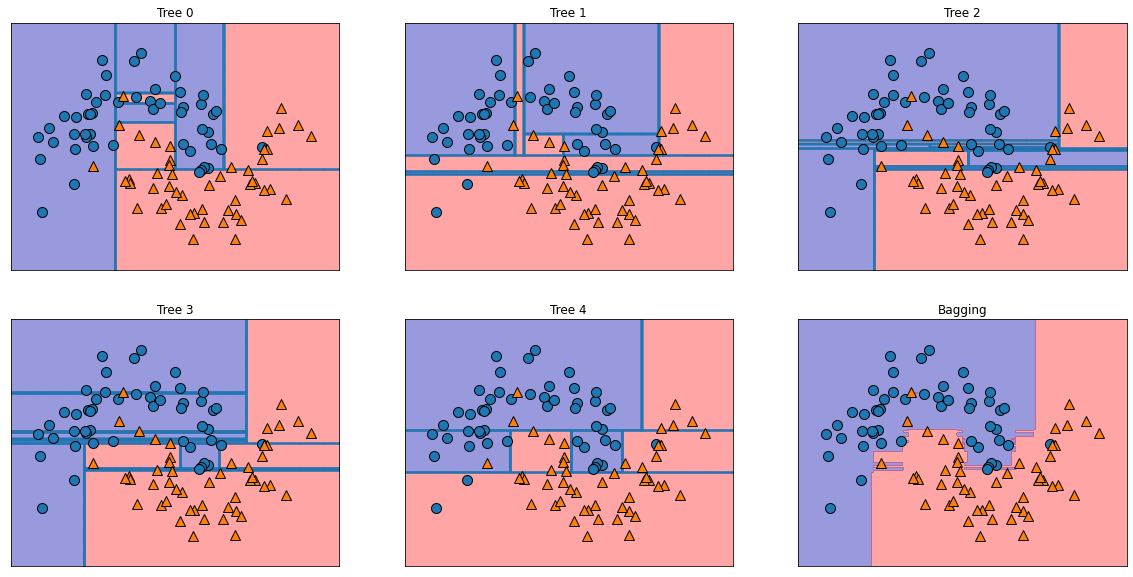

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1952926171, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1761383086, splitter='best'), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Bagging')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

print(axes.ravel())
print(bagging.estimators_)

랜덤 포레스트가 나타내는 결정 경계와 매우 유사합니다.

`n_estimatores=100`으로 지정하여 cancer 데이터셋에 훈련시키고 훈련 세트와 테스트 세트의 성능을 확인합니다.

In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플 정확도: 0.951


랜덤 포레스트와 다르게 배깅은 `max_samples` 매개변수에 부트스트랩 샘플 크기를 지정합니다. 참고로 랜덤 포레스트는 `RandomForestClassifier(splitter='best')`로 고정됩니다. `splitter='random'`으로 지정하면 무작위로 분할한 후보 노드 중에서 최선의 분할을 찾습니다. 이런 결정 트리의 배깅은 아래에서 다루는 **엑스트라 트리**와 관련이 있습니다.

### **2.3.7.2. 엑스트라 트리**

**엑스트라 트리(Extra-Trees)**는 랜덤 포레스트와 유사하지만 후보 특성을 무작위로 분할해서 최적의 분할을 찾습니다. 아울러 랜덤 포레스트와 달리 `DecisionTreeClassifier(splitter='random')`을 사용하고 부트스트랩 샘플링은 적용하지 않습니다. 무작위성을 증가시키면 모델의 편향이 늘지만 분산은 감소합니다. 랜덤 포레스트와 엑스트라 트리는 다른 방식으로 무작위성을 모델에 적용하는 것입니다. 예측 방식은 랜덤 포레스트와 동일하게 각 트리가 만든 확률값을 평균합니다.

two_moons 데이터셋에 엑스트라 트리를 적용해서 결정 경계를 확인합니다. 후보 노드를 랜덤하게 분할해서 최선의 분할을 찾습니다.

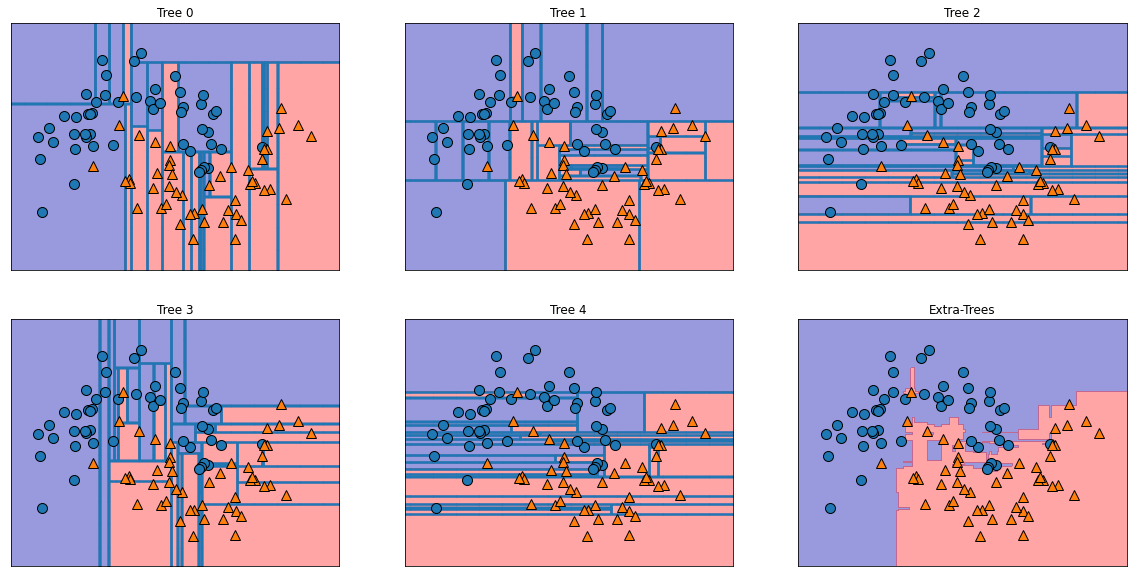

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)
xtree.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('Extra-Trees')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

각 트리의 결정 경계가 더 복잡해졌지만 비교적 안정적인 형태를 취합니다.

트리 개수를 100으로 지정해서 cancer 데이터셋을 적용합니다.

In [ ]:
xtree = ExtraTreesClassifier(n_estimators=100, n_jobs=-1, random_state=0)
xtree.fit(Xc_train, yc_train)

print('훈련 세트 정확도: {:.3f}'.format(xtree.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


엑스트라 트리는 랜덤 포레스트와 거의 같은 성능을 냅니다. 엑스트라 트리가 랜덤 포레스트보다 계산 비용이 적지만 일반화 성능을 높이기 위해 많은 트리를 생성해야 합니다. 이는 무작위 분할 때문입니다. 따라서 일반적으로 랜덤 포레스트가 더 선호됩니다.

엑스트라 트리의 특성 중요도를 시각화합니다. 

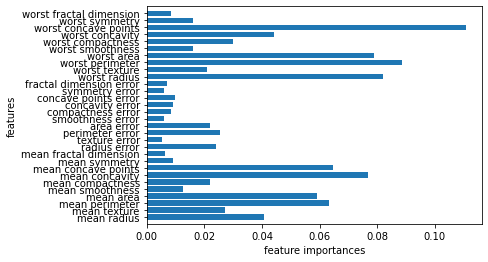

In [ ]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importances')
plt.ylabel('features')
plt.ylim(-1, n_features)
plt.show()

랜덤 포레스트와 유사합니다.

### **2.3.7.3. 에이다부스트**

**에이다부스트(AdaBoost, Adaptive Boosting)**는 그레이디언트 부스팅처럼 약한 학습기를 사용하지만, 그레이디언트 부스팅과의 차이점은 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킵니다. 훈련된 각 모델은 성능에 따라 가중치가 부여되고, 예측을 만들 때 모델이 예측한 레이블을 기준으로 가중치를 합산해서 가장 높은 값을 지닌 레이블을 고릅니다.

`AdaBoostClassifier`는 기본값으로 `DecisionTreeClassifier(max_depth=1)`를 사용하고, `AdaBoostRegressor`는 기본값으로 `DecisionTreeRegressor(max_depth=3)`를 사용합니다. `base_estimator` 매개변수에 다른 모델을 지정할 수 있습니다. 그레이디언트 부스팅처럼 순차 학습 방법을 취하므로 `n_jobs` 매개변수를 지원하지 않습니다.

기본값을 사용하여 two_moons 데이터셋과 cancer 데이터셋에 적용합니다. 먼저 two_moons 데이터셋에 적용해서 결정 경계를 그립니다.

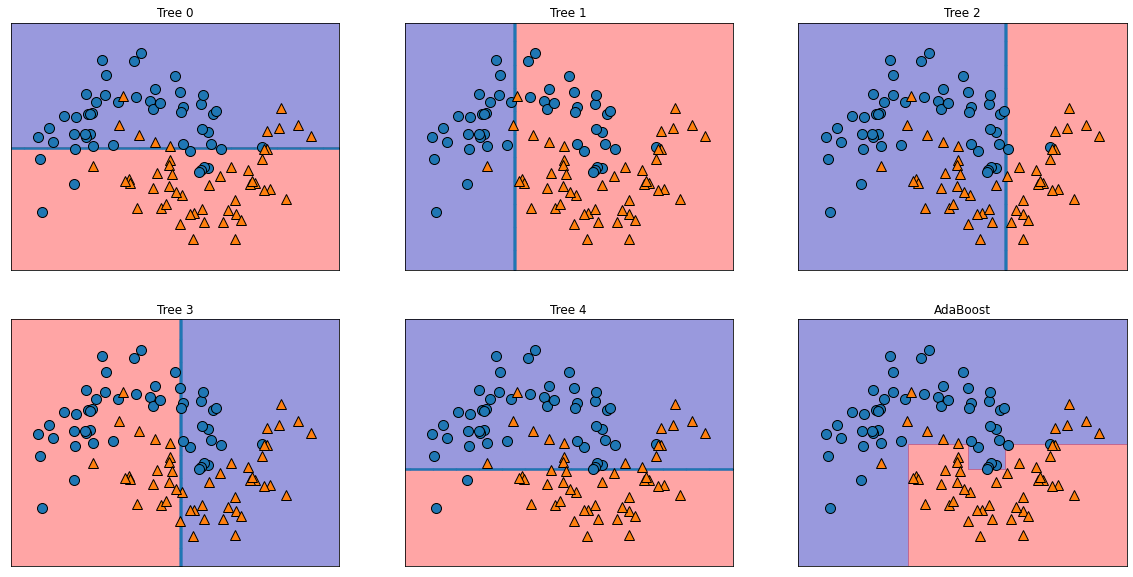

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('AdaBoost')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

`AdaBoostClassifier`는 깊이가 1인 결정 트리를 사용하므로 각 트리의 결정 경계가 직선 하나로 나타납니다. 앙상블 된 결정 경계 또한 다른 앙상블 모델에 비해 단순합니다.

cancer 데이터셋에 적용합니다.

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

print('훈련 세트 정확도: {:.3f}'.format(ada.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.986


매우 얕은 트리를 앙상블 했기 때문에 일반화 성능을 약간 향상시켰습니다.

특성 중요도를 확인합니다.

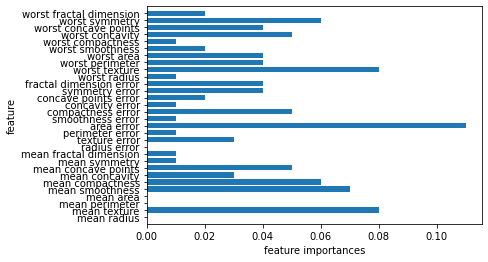

In [ ]:
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

다른 모델과는 달리 'area error' 특성이 높게 강조된 것을 볼 수 있습니다.

## **2.3.8. 커널 서포트 벡터 머신**

**커널 서포트 벡터 머신(SVM, kernelized support vector machine)**은 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들도록 확장한 것입니다. 분류와 회귀 모두에 사용할 수 있지만 책에서는 `SVC`를 사용하는 분류 문제만 다룹니다. `SVR`을 사용하는 회귀 문제에도 같은 개념을 적용합니다. 여하튼 알고리즘 이면에 존재하는 아이디어 정도만 살핍니다.

### **2.3.8.1. 선형 모델과 비선형 특성**

위에서 제시한 [그림 2-15]에서 보았듯이 직선과 초평면은 유연하지 못해서 저차원 데이터셋에서는 선형 모델이 매우 제한적입니다. 특성을 제곱하거나 특성끼리 곱하는 방법으로 새로운 특성을 추가해서 선형 모델을 유연하게 만들 수 있습니다.

2.3.5 결정 트리의 트리의 특성 중요도 파트에서 사용한 인위적 데이터셋을 다시 살펴봅니다. 선형으로 구분되지 않는 클래스를 가진 이진 분류 데이터셋 그래프를 그립니다.

Text(0, 0.5, 'feature 1')

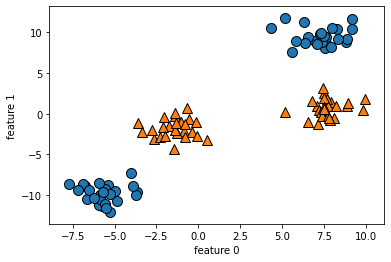

In [ ]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 2')

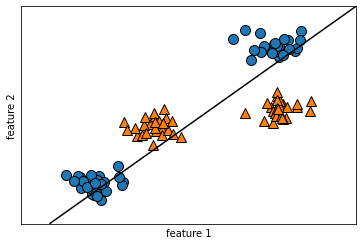

In [ ]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

선형 SVM으로 만든 결정 경계입니다. 분류를 위한 선형 모델은 직선만으로 샘플을 나누므로 적합하지 않습니다.

두 번째 특성을 제곱한 특성1$^2$를 새로운 특성으로 추가해서 특성을 확장합니다. 특성0, 특성1, 특성1$^2$이라는 특성 3개로 이루어진 3차원 데이터 포인트로 표현됩니다. 이를 3차원 산점도로 그립니다.

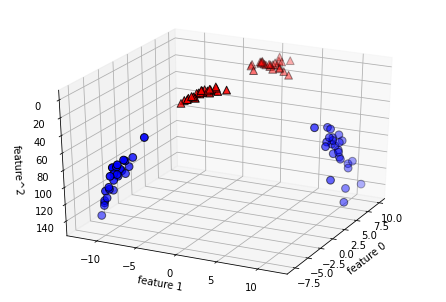

In [ ]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

# 두 번째 특성을 제곱하여 새로운 특성 하나를 생성합니다.
X_new = np.hstack([X, X[:, 1:] ** 2])

figure = plt.figure()
# 3차원 그래프를 생성합니다.
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0인 포인트를 먼저 그린 다음에 y == 1인 포인트를 그립니다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
# 물결 표시(~)는 True를 False로, False라면 True로 바꾸는 원리를 가집니다. 반대로 바꾸는 것입니다.
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature^2')
plt.show()

확장된 데이터셋으로 선형 모델을 만듭니다. 코드 해석이 잘 안 되거나 수식이 잘 이해되지 않으면 일단 넘어가도 됩니다. 아래 출력된 그래프를 제시하는 데 의의를 둡니다.

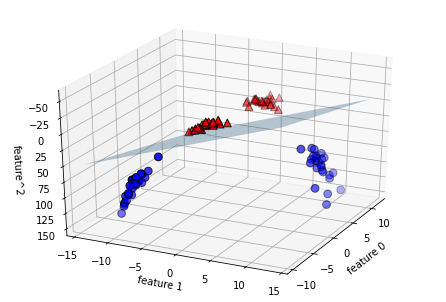

In [ ]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계를 그립니다.
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',
           marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature^2')
plt.show()

이를 원래 특성으로 투영하면 선형이 아니라는 점을 알 수 있음. 타원에 가까움.

Text(0, 0.5, 'feature 1')

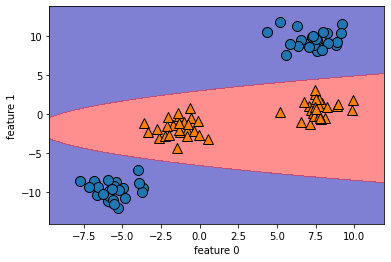

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

### **2.3.8.2. 커널 기법**

앞에서는 비선형 특성을 추가해서 선형 모델을 강력하게 만들었으나, 실전에서는 어떤 특성을 추가해야 할지 모르고 특성을 많이 추가하면 연산 비용이 커집니다. 이런 문제를 해결하기 위해 **커널 기법(kernel trick)**을 사용합니다. 수학적 기교라고 할 수 있는데, 새로운 특성을 많이 생성하지 않아도 고차원에서 분류기를 학습시킬 수 있습니다. 실제로 데이터를 확장하지 않고 확장된 특성에 대한 샘플(앞으로는 데이터 포인트 대신 샘플을 사용함)들의 거리(스칼라 곱)를 계산합니다.

서포트 벡터 머신으로 데이터를 고차원 공간에 매핑 하는 데 많이 사용하는 방법은 아래 두 가지가 있습니다. 무슨 의미인지 이해하기 어려우시면 일단 넘어가셔도 괜찮습니다. 아래에서 계속 설명합니다.

- **다항식 커널**: 본래 존재하는 특성의 가능한 조합을 지정된 차수까지 모두 계산합니다(예를 들면 특성1$^2 \times $특성2$^5$).

- **가우시안(Gaussian) 커널(RBF, radial basis function)**: 지수 함수의 테일러 전개를 이용하여 차원이 무한한 특성 공간(다항식 차원)에 매핑합니다. 다시 말하면 모든 차수의 모든 다항식을 고려합니다. 고차항이 될수록 특성 중요도가 줄어드는데, 그 이유는 지수 함수의 테일러 급수 전개 때문입니다.

### **2.3.8.3. SVM 이해하기**

SVM은 각 훈련 샘플이 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지 학습하게 됩니다. 일반적으로는 훈련 데이터의 일부(두 클래스 사이의 경계에 위치한 일부 샘플)만 결정 경계를 만드는 데 영향을 미칩니다. 이런 데이터를 **서포트 벡터(support vector)**라고 부르며 이 명칭에서 서포트 벡터 머신으로 명명된 것입니다.

새로운 샘플에 대해 예측하기 위해 각 서포트 벡터와의 거리를 측정합니다. 분류 결정은 서포트 벡터까지의 거리에 기반하며, 서포트 벡터의 중요도는 훈련 과정에서 학습하고 `SVC` 객체의 `dual_coef_` 속성에 저장됩니다.

샘플 사이의 거리는 가우시안 커널에 의해 계산됩니다. 아래는 이를 나타낸 공식입니다.

$k_{rbf}(x_1, x_2)$ = exp$(-\gamma \lVert x_1 - x_2 \rVert^2)$

$x_1$과 $x_2$는 샘플, $\lVert x_1 - x_2 \rVert$는 유클리디안 거리, $\gamma$(감마, gamma)는 가우시안 커널의 폭을 제어하는 매개변수입니다.

두 개의 클래스를 가진 2차원 데이터셋인 forge 데이터셋에 SVM을 학습시킨 결과를 나타내는 그래프를 그립니다. 결정 경계는 검은 실선, 서포트 벡터는 굵은 테두리로 그립니다. [RBF 커널](https://ichi.pro/ko/bangsahyeong-gijeo-hamsu-rbf-keoneol-idong-keoneol-190150318258570)을 사용한 SVM으로 만든 결정 경계와 서포트 벡터를 나타냅니다.

Text(0, 0.5, 'feature 1')

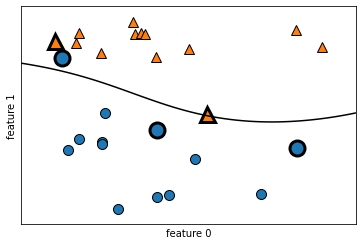

In [ ]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
# 'RBF 커널'을 사용합니다.
# `C` 매개변수와 `gamma` 매개변수는 다음 파트에서 설명합니다.
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 샘플을 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터를 지정합니다.
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() > 0 
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

SVM은 매우 부드럽고 비선형인 경계를 만듭니다.

### **2.3.8.4. SVM 매개변수 튜닝**

`gamma` 매개변수는 앞 절의 공식에 나와 있는 $\gamma$로 가우시안 커널 폭의 역수이며, 훈련 샘플 하나가 미치는 영향의 범위를 결정합니다. 작은 값은 넓은 영역을 뜻하고, 큰 값이라면 영향을 미치는 범위가 제한적입니다. 다시 말하면 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커집니다(`gamma` > 0 조건을 충족해야 하므로 가우시안 커널 함수 값의 범위는 $e^0$~$e^{-\infty}$, 즉 1 ~ 0사이입니다. 따라서 `gamma` 값이 작을수록 샘플의 영향 범위가 커집니다).

`C` 매개변수는 선형 모델에서 사용한 매개변수와 비슷한 규제 매개변수입니다. 이 매개변수는 각 포인트의 중요도(`dual_coef_`값)를 제한합니다.

매개변수를 조정한 결과를 그립니다.

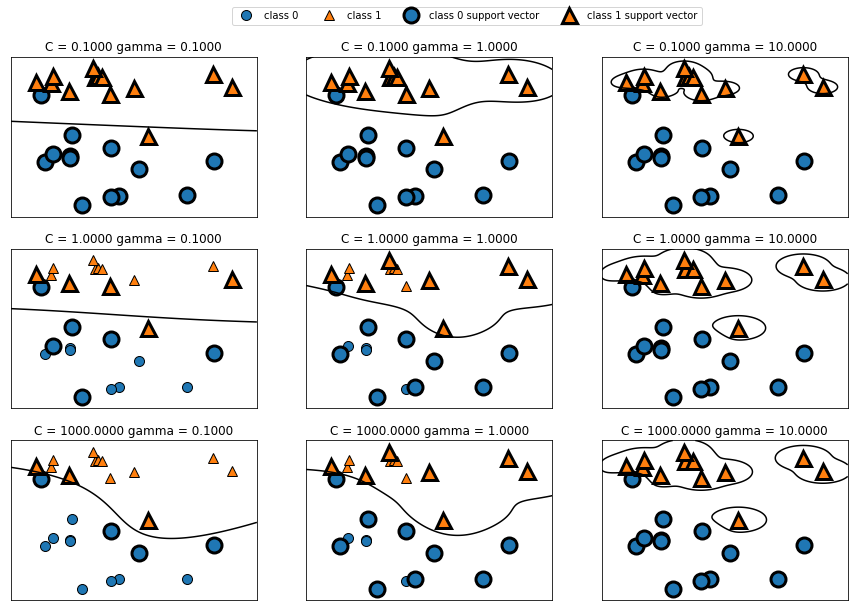

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(['class 0', 'class 1', 'class 0 support vector',
                   'class 1 support vector'], ncol=4, loc=(.9, 1.2))
plt.show()

왼쪽에서 오른쪽으로 가면서 `gamma` 매개변수를 0.1 -> 10으로 증가시킵니다. 작은 `gamma` 값은 가우시안 커널의 반경을 크게 해서 많은 샘플들이 가까이 위치합니다. 왼쪽은 결정 경계가 매우 부드럽고, 오른쪽은 결정 경계가 샘플 하나마다 더 민감해집니다. 작은 `gamma` 값이 결정 경계를 천천히 바뀌게 하므로 모델 복잡도를 낮추고, 큰 `gamma` 값은 더 복잡한 모델을 만듭니다.

위에서 아래로 가면서 `C` 매개변수를 0.1 -> 1000으로 증가시킵니다. 선형 모델에서처럼 작은 `C`는 제약이 큰 모델을 생성하고 각 샘플이 가진 영향력이 작습니다. 왼쪽 위는 결정 경계가 거의 선형에 가깝고 잘못 분류된 샘플이 경계에 주는 영향이 거의 없습니다. 왼쪽 아래는 `C`를 증가시키면 샘플들이 모델에 큰 영향을 주고 결정 경계를 곡선으로 만들면서 분류를 정확하게 합니다.

RBF 커널 SVM(기본값 `C=1`, `gamma='scale'`)을 유방암 데이터셋에 적용합니다. `'scale'`은 1/(X_train.shape[1]*X_train.std())이며, 스케일이 조정되지 않은 특성에서 더 좋은 결과를 만듭니다. 참고로 SVM을 적용하기 전에 특성을 표준화 전처리 하면 `gamma` 매개변수의 값인 `'scale'`과 `auto`(이전 버전 사이킷런에서의 기본값)는 차이가 없습니다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print('훈련 세트 정확도: {:.2f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


과소적합 된 모델입니다. SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 민감합니다. 특히 입력 특성 범위가 비슷해야 합니다.

각 특성의 최솟값과 최댓값을 로그 스케일로 나타냅니다.

Text(0, 0.5, 'feature size')

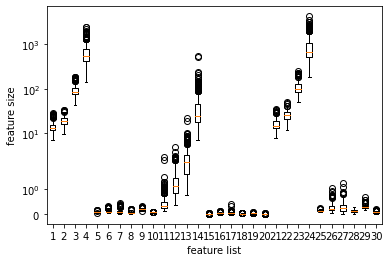

In [ ]:
plt.boxplot(X_train)
plt.yscale('symlog')
plt.xlabel('feature list')
plt.ylabel('feature size')

그래프를 살펴보면 유방암 데이터셋의 특성은 자릿수가 상이해서 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큽니다. 아래 파트에서 이 문제를 해결하는 방법을 설명합니다.

### **2.3.8.5. SVM을 위한 데이터 전처리**

위 문제에서 지적했듯이 특성의 자릿수가 상이할 경우에는 특성 값의 범위가 비슷해지도록 데이터를 전처리 해야 합니다. SVM에서는 모든 특성 값을 평균이 0이고 단위 분산이 되도록 하거나 0~1 사이로 맞추는 방법을 많이 사용합니다. 3장에서 자세하게 다룰 예정입니다. 여러 전처리 방법 중에 어떤 방법이 적합한지는 데이터셋이 가진 성질에 따라 다릅니다.

책에서 제시한 코드로 직접 변환을 시도합니다. 아래 코드에서 사용한 식인 $\frac{X-min(X)}{max(X)-min(X)}$에서 최대와 최소간의 차이가 분모가 되므로 결과는 항상 0~1 사잇값이 됩니다. 데이터셋에 따라 `StandardScaler` 클래스도 사용할 수 있으나 이 내용은 3장에서 상세하게 다룹니다.

In [ ]:
# 훈련 세트에서 특성별 최솟값을 계산합니다.
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위를 계산합니다.
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0, 최댓값은 1입니다.
X_train_scaled = (X_train - min_on_training) / range_on_training
print('특성별 최솟값\n', X_train_scaled.min(axis=0))
print('특성별 최댓값\n', X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


데이터의 스케일을 조정하여 정확도 점수를 확인합니다.

In [ ]:
# 테스트 세트에도 같은 작업을 적용합니다.
# 다만 훈련 세트에서 계산한 최솟값과 범위를 사용합니다.
# 3장에서 자세하게 설명할 예정입니다.
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


훈련 세트와 테스트 세트의 정확도 모두 상승하면서 과소적합을 많이 없앴습니다.

In [ ]:
svc = SVC(C=0.01)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.643
테스트 세트 정확도: 0.636


In [ ]:
svc = SVC(C=0.1)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.958


In [ ]:
svc = SVC(C=10)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [ ]:
svc = SVC(C=100)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [ ]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.979


가장 적절한 `C` 값은 `20`입니다.

### **2.3.8.6. 장단점과 매개변수**

SVM은 다양한 데이터셋에서 잘 작동하고 데이터 특성의 수가 적더라도 복잡한 결정 경계를 생성할 수 있습니다. 저차원과 고차원의 데이터(특성이 적고 많은 것을 다르게 의미하는 표현)에 모두 잘 작동하지만, 샘플 수가 많을 경우엔 적합하지 않습니다. 예를 들면 샘플 10,000개의 경우엔 잘 작동하고, 샘플 100,000개 이상의 경우엔 속도와 메모리 관점에서 수월하지 않은 경향이 있습니다.

다른 단점을 제시하자면, 데이터 전처링와 매개변수 설정에 많은 노력을 기울여야 한다는 점입니다. 따라서 SVM보다는 랜덤 포레스트나 그레이디언트 부스팅처럼 전처리 과정이 거의 필요 없거나 전혀 필요 없는 트리 기반 모델을 많이 사용합니다.

아울러 SVM은 분석하기 어렵고, 어떻게 예측이 이루어지는지 이해하기 난해하며, 비전문가에게 모델에 대해 설명하기 또한 쉽지 않습니다.

다만 모든 특성이 비슷한 단위(픽셀의 컬러 강도가 모든 값을 이루는 데이터셋의 형태)이면서 스케일이 비슷하면 SVM을 시도할 만합니다.

커널 SVM에서 중요한 매개변수는 `C` 매개변수와 `gamma` 매개변수입니다. 먼저 `C` 매개변수는 커널 종류에 따른 규제의 정도를 숫자값으로 조정합니다. `C`와 `gamma` 모두 모델의 복잡도를 조정하고 둘 다 큰 값이 더 복잡한 모델을 생성합니다. 따라서 이 두 매개변수는 연관성이 크므로 함께 조정하면서 최적값을 찾아야 합니다.

위에서 살핀 **RBF 커널**은 `kenel` 매개변수의 기본값으로 설정된 `kbf`이며, 가우시안 커널 폭의 역수인 `gamma` 매개변수 하나를 가집니다.

참고로 `kernel` 매개변수는 아래 5가지 값을 가집니다.

- `rbf`

- `linear`: $(x_1 \cdot x_2)$

- `poly`: $(\gamma(x_1 \cdot x_2)+c)^{d}$

- `sigmoid`: $(tanh(\gamma(x_1 \cdot x_2)+c))$

- `precomputed`

가우시안 커널의 공식 exp$(\frac{-\parallel x_1-x_2 \parallel^2}{2\sigma^2})$을 exp$(-\gamma \parallel x_1-x_2 \parallel^2)$로 간단하게 표현할 수 있습니다.   
여기에서 $\gamma=\frac{1}{2\sigma^2}$인 $\sigma$가 종종 가우시안 커널의 폭을 조절한다고 합니다.

## **2.3.9. 신경망(딥러닝)**

추후에 정리할 예정입니다.

### **2.3.9.1. 신경망 모델**

### **2.3.9.2. 신경망 튜닝**

### **2.3.9.3. 장단점과 매개변수**

### **2.3.9.4. 신경망의 복잡도 추정**

# **2.4. 분류 예측의 불확실성 추정**

사이킷런에서 많이 사용하는 인터페이스 중에 하나는 분류기에 예측의 불확실성을 추정할 수 있는 기능입니다. 어떤 테스트 샘플에 대해 분류기가 예측한 클래스뿐만 아니라 클래스가 얼마나 정확한지를 아는 것이 중요합니다. 실제 애플리케이션에서는 오류의 종류에 따라 전혀 다른 결과를 도출합니다.

암을 진단하는 의료 애플리케이션을 예로 들면, 거짓 양성(false positive)으로 예측하면 환자에게 추가로 진료 받으라는 권고를 하겠지만 거짓 음성(false negative)으로 예측하면 제때 질병을 치료하지 못해서 환자에게 심각한 결과를 초래할 수 있습니다. 6장에서 이 주제를 자세하게 다룰 예정입니다.

여하튼 사이킷런 분류기에서 불확실성을 추정할 수 있는 함수는 `decision_function`과 `predict_proba`가 있습니다. 전체는 아니지만 분류 클래스 대부분은 적어도 둘 중 하나를 제공하고, 두 함수 모두를 제공하는 경우도 많습니다.

인위적으로 생성한 2차원 데이터셋을 사용해서 `GradientBoostingClassifier` 분류기의 `decision_function`과 `predict_proba` 메서드의 역할을 설명합니다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

# `make_circles` 함수의 매개변수가 가진 기능은
# 해당 함수 위에 마우스를 올리면 함수에 대한 설명과 함께 설명되어 있습니다.
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스 이름을 0(음성 클래스)은 "blue"로, 1(양성 클래스)은 "red"로 변경합니다.
# 리스트와 리스트를 이어서 연결하면 해당하는 순서의 값을 출력합니다.
y_named = np.array(['blue', 'red'])[y]
print(y)
print(y_named)

# 배열 여러 개를 `train_test_split` 함수에 한꺼번에 넣을 수 있습니다.
# 훈련 세트와 테스트 세트로 나뉘는 방식은 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(
    X, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0]
['red' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'blue' 'red' 'red' 'red' 'blue' 'blue' 'blue' 'red' 'blue' 'blue' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red'
 'red' 'red' 'blue' 'blue' 'red' 'blue' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'blue' 'blue' 'red'
 'blue' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'red' 'blue' 'blue' 'red'
 'blue' 'red' 'blue' 'red' 'red' 'blue' 'red' 'red' 'blue' 'red' 'blue'
 'red' 'red' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'red' 'blue' 'blue'
 'red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'blue' 'red' 'blue'
 'blue']


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## **2.4.1. 결정 함수**

이진 분류에서 `decision_function` 메서드의 반환값 크기는`(n_samples,)` 형태이며 각 샘플이 하나의 실숫값을 반환합니다.

In [ ]:
print('X_test.shape:', X_test.shape)
print('결정 함수 결과 형태:', gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


이 값은 모델이 샘플이 클래스1(양성 클래스)에 속한다고 믿는 정도를 나타냅니다. 양숫값은 양성 클래스를 의미하고, 음숫값은 음성 클래스를 의미합니다. 아래에서 결정 함수 결과 중에 첫 번째부터 6개만 확인합니다.

In [ ]:
print('결정 함수:\n', gbrt.decision_function(X_test)[:6])

결정 함수:
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


결정 함수 부호만 보고 예측 결과를 알 수 있습니다.

In [ ]:
print('임계치와 결정 함수 결과 비교:\n', gbrt.decision_function(X_test) > 0)
print()
print('예측:\n', gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]

예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


이진 분류에서 `classes_` 속성의 첫 번째 원소는 음성 클래스, 두 번째 원소는 양성 클래스입니다.. `predict` 함수를 재현하려면 `classes_` 속성을 사용해야 합니다.

In [ ]:
# 불리언 값을 0과 1로 변환합니다.
# `astype(int)` 함수를 사용하여 False는 0, True는 1로 치환합니다.
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
print(greater_zero)
print()
# `classes_` 속성에 인덱스로 사용합니다.
pred = gbrt.classes_[greater_zero]
print(pred)
print()
#'pred'와 `gbrt.predict`의 결과를 비교합니다.
# 넘파이 `all()` 함수는 모든 원소가 조건에 부합하면 True를 출력합니다.
print('pred는 predict와 같음?', np.all(pred == gbrt.predict(X_test)))

[1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0]

['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']

pred는 predict와 같음? True


`decision_function` 메서드 값의 범위는 데이터와 모델 파라미터에 따라 달라집니다.

In [ ]:
decision_function = gbrt.decision_function(X_test)
print('결정 함수 최솟값: {:.2f}  최댓값: {:2f}'.format(
    np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값: -7.69  최댓값: 4.289867


`decision_function` 메서드의 출력 범위가 임의의 값이므로 이해하기 어렵습니다.

2차원 평면의 모든 점에 대해 `decision_function` 메서드의 값을 색으로 표현하고 결정 경계를 그립니다. 훈련 데이터는 원모양, 테스트 데이터는 삼각형 모양으로 나타냅니다. 왼쪽은 결정 경계, 오른쪽은 결정 함수를 나타냅니다.

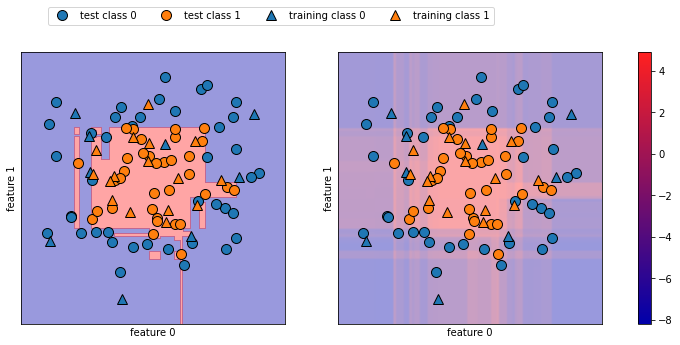

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    #훈련 포인트, 테스트 포인트를 그립니다.
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test class 0', 'test class 1', 'training class 0', 'training class 1'],
               ncol=4, loc=(.1, 1.1))
plt.show()

예측한 결과뿐만 아니라 분류기가 얼마나 확신하는지를 알면 추가 정보를 얻을 수 있습니다. 다만 두 클래스 사이의 경계를 구분하기는 어렵습니다.

## **2.4.2. 예측 확률**

`predict_proba` 메서드의 출력값은 각 클래스에 대한 확률이고 `decision_function`의 출력에 비해 이해하기 더 수월합니다. 이 값의 크기는 이진 분류에서는 항상 `(n_samples, 2)` 형태를 취합니다.

In [ ]:
print('확률 값의 형태:', gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


첫 번째 원소는 첫 번째 클래스의 예측 확률, 두 번째 원소는 두 번째 클래스의 예측 확률입니다. 확률이므로 항상 0~1 사잇값을 가지며 두 클래스에 대한 모든 확률의 합은 1입니다.

`predict_proba` 메서드의 값 중에 6개만 출력합니다.

In [ ]:
print('예측 확률:\n', gbrt.predict_proba(X_test[:6]))

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


두 클래스의 확률 합은 1이므로 두 클래스 중에 하나는 50% 이상의 확신을 가집니다. 높은 확률 값을 가진 클래스가 예측값입니다.

앞의 출력 값을 보면 샘플 대부분에서 분류기가 강한 확신을 보여주는 것을 알 수 있습니다. 데이터에 있는 불확실성이 값에 반영되는 정도는 모델과 매개변수 설정에 좌우됩니다. 과대적합 된 모델은 잘못된 예측이라도 예측 확실성이 강하고, 복잡도가 낮은 모델은 예측 불확실성이 더 높습니다. 이런 불확실성과 모델의 정확도가 동등하면 이 모델은 **보정(calibration)**되었다고 말합니다. 보정된 모델에서 70% 확신을 가진 예측은 70% 정확도를 낼 것입니다. 이해하시기 어렵다면 **혼자 공부하는 머신러닝 + 딥러닝** 서적에 대한 정리본의 결정함수 파트를 참고하시기 바랍니다.

보정 곡선은 사이킷런의 [`calibration_curve()`](https://bit.ly/3yoVG25)함수로 그릴 수 있습니다. 자세한 사용법은 [링크](https://bit.ly/3Am4rvu)를 참고하시기 바랍니다.

같은 데이터셋을 사용해서 그레이디언트 부스팅 모델의 결정 경계와 클래스 1의 확률을 그립니다.

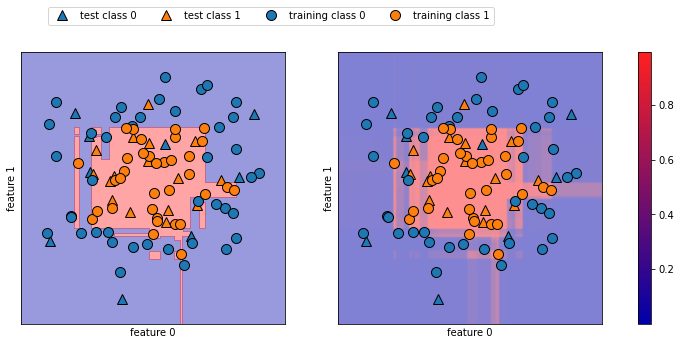

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그립니다.
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
# colorbar를 그립니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['test class 0', 'test class 1', 'training class 0', 'training class 1'], ncol=4, loc=(.1, 1.1))
plt.show()

왼쪽 그림을 보면 결정 경계가 명확하게 나뉘어 있으며, 왼쪽 그림을 보면 불확실성이 있는 작은 영역도 확인할 수 있습니다.

[불확실성 추정을 비교한 사이킷런 사이트 좌표](https://bit.ly/2cqCYx6)를 참고하여 인위적으로 만든 데이터셋을 사용한 여러 분류기를 확인하시길 바랍니다. 아래 코드는 해당 좌표에서 가져온 비교 그림입니다.

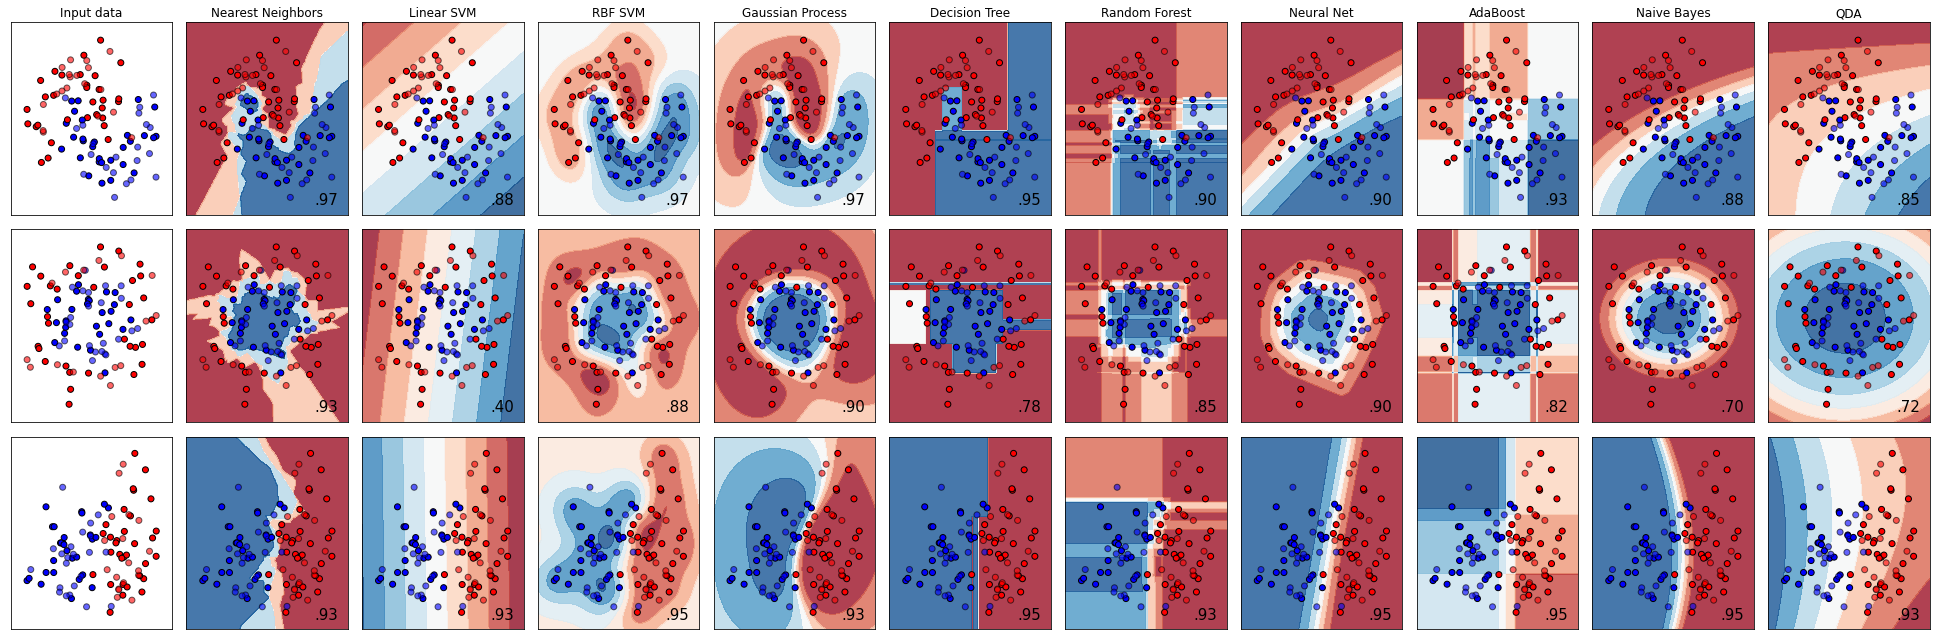

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## **2.4.3. 다중 분류에서의 불확실성**

위에서 사용한 `decision_function` 메서드와 `predict_proba` 메서드는 다중 분류에도 사용할 수 있습니다.

클래스가 세 개인 iris 데이터셋에 적용합니다.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print('결정 함수의 결과 형태:', gbrt.decision_function(X_test).shape)
# 앞부분 6개만 확인합니다.
print('결정 함수 결과:\n', gbrt.decision_function(X_test)[:6])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


다중 분류의 경우 `decision_function` 메서드의 결괏값 크기는 `(n_samples, n_classes)` 형태를 취합니다. 각 열은 각 클래스에 대한 확신 점수를 가지는데, 수치가 크면 해당 클래스일 확률이 높고, 수치가 작으면 해당 클래스일 확률이 낮습니다. 샘플마다 가장 큰 점수를 찾아서 예측 결과를 동일하게 출력할 수 있습니다.

In [ ]:
print('가장 큰 결정 함수의 인덱스:\n', np.argmax(gbrt.decision_function(X_test), axis=1))
print('예측:\n', gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


`predict_proba` 메서드의 출력값 크기를 출력합니다. 위에서 확인했던 바로 `(n_samples, n_classes)` 형태를 취하며, 각 샘플에서 클래스 확률을 모두 더하면 1입니다.

In [ ]:
# 앞부분 6개만 확인합니다.
print('예측 확률:\n', gbrt.predict_proba(X_test)[:6])
# 행 방향(`axis=1`)으로 합하면 1입니다.
print('총합:', gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
총합: [1. 1. 1. 1. 1. 1.]


`predict_proba` 결과에 `argmax` 함수를 적용해서 예측을 같게 출력합니다.

In [ ]:
print('가장 큰 예측 확률의 인덱스:\n', np.argmax(gbrt.predict_proba(X_test), axis=1))
print('예측:\n', gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


`predict_proba`와 `decision_function`의 결괏값 크기는 항상 `(n_samples, n_classes)`이지만, 이진 분류의 `decision_function`은 약간 다릅니다. 이진 분류에서 `decision_function`은 열이 하나뿐이고 양성 클래스인 `classes_[1]`에 대응하는 값을 가집니다. 오래전부터 내려온 관례 때문이라고 합니다.

열이 `n_classes`개일 경우에는 열을 가로질러 `argmax` 함수를 적용해서 예측 결과를 재현할 수 있습니다. 다만 주의할 점은 클래스가 문자열이거나, 정수형을 사용하지만 연속적이지 않고 0부터 시작하지 않을 수 있습니다. 클래스가 숫자일 경우엔 `predict_proba`와 `decision_function`의 배열 인덱스와 동일할 수 있으며 `argmax` 값이 그대로 예측 클래스가 됩니다. 하지만 클래스 숫자가 "1"처럼 문자열이거나 연속된 숫자가 아닐 수 있으므로 항상 `classes_` 값을 사용해야 버그 발생을 방지할 수 있습니다.

여하튼 `predict`로 출력한 결과와 `decision_function`,`predict_proba`의 결과를 비교하려면 분류기의 `classes_` 속성을 사용해서 클래스의 실제 이름을 얻어야 합니다.

In [ ]:
logreg = LogisticRegression(max_iter=5000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타냅니다.
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print('훈련 데이터에 있는 클래스 종류:', logreg.classes_)
print('예측:', logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print('가장 큰 결정 함수의 인덱스:', argmax_dec_func[:10])
print('인덱스를 classes_에 연결:', logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


# **2.5. 요약 및 정리**

- **최근접 이웃**: 작은 데이터셋일 경우에 기본 모델로서 좋고 설명하기 수월합니다.

- **선형 모델**: 맨처음 시도해볼 만한 알고리즘으로 큰 데이터셋이나 고차원 데이터에 가능합니다.

- **나이브 베이즈**: 분류만 가능하며, 선형 모델보다 속도가 훨씬 빠르지만 덜 정확합니다. 용량 데이터셋, 고차원 데이터에 가능합니다.

- **결정 트리**: 매우 빠르고, 데이터 스케일 조정이 필요하지 않습니다. 시각화하기 좋으므로 설명하기에 매우 수월합니다.

- **랜덤 포레스트**: 결정 트리 하나보다 좋은 성능을 내며 매우 안정적이고 강력합니다. 데이터 스케일 조정 작업이 필요하지 않지만 고차원 희소 데이터에는 적합하지 않습니다.

- **그레이디언트 부스팅 결정 트리**: 랜덤 포레스트에 비하면 성능이 약간 좋은 수준이면서 학습은 느리지만 예측은 빠르고 메모리를 조금 사용합니다.

- **서포트 벡터 머신**: 비슷한 의미의 특성으로 이러진 중간 규모 데이터셋에 적합합니다. 데이터 스케일을 조정해야 하며 매개변수에 민감하므로 적절한 값을 지정해야 합니다.

- **신경망**: 추후 추가 예정입니다.

새로운 데이터셋으로 작업할 때는 간단한 모델(선형 모델, 나이브 베이즈 또는 최근접 이웃 분류기)로 시작해서 성능이 얼마나 나오는지 가늠해보는 것이 좋습니다. 데이터에 대해 파악한 후에는 복잡한 모델을 만들 수 있는 알고리즘(랜덤 포레스트, 그레이디언트 부스팅 결정 트리, SVM, 신경망)을 고려할 만합니다.